# Problem Statement

## Context

### Problem Statement

Kampanye penawaran pembukaan term deposit (deposito) akan membutuhkan banyak waktu dan sumber day jika perusahaan menargetkan semua nasabah tanpa melakukan penyaringan. Pihak bank ingin meningkatkan efesiensi penawaran dengan mengetahui nasabah mana yang kemungkinan besar ingin membuka term deposit (deposito).

### Goals

Melihat dari permasalahan yang dimiliki, maka bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah untuk membuka term deposit atau tidak, sehingga dapat memfokuskan penawaran pada nasabah yang bersedia.

Dan juga, bank ingin mengetahui apa/factor/variable yang membuat seorang nasabah ingin membuka term deposit (deposito) atau tidak, sehingga divisi marketing dapat membuat rencana lebih baik dalam mendekati nasabah potensial.

### Analytic Approach 

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang mau membuka term deposit atau tidak.

Kemudian akan dibangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin membuka term deposit (deposito) atau tidak.

### Metriks Evaluasi

![Alt text](<image/me.jpg>)

Type 1 error : False Positive

Konsekuensi : Sia-sianya biaya penawaran, waktu dan sumber daya

Type 2 error : False Negative

Konsekuensi : Kehilangan Nasabah Potensial.

In [389]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
from IPython.display import display
from plotnine import *
import plotnine

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from sklearn.feature_selection import RFE, RFECV

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef,precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)


# DATA UNDERSTANDING

Data Source : https://archive.ics.uci.edu/ml/datasets/bank+marketing

Bank Marketing Campaign

Sebuah dataset yang mendeskripsikan hasil kampanye market sebuah bank di Portugal. Kampanye dilakukan kebanyakan lewat telepon, menawarkan klien untuk melakukan deposito. Jika setuju makan target variabel akan diisi oleh ‘yes’ selain itu ‘no’


Deposito : jenis rekening deposito dimana dana yang ada akan dikunci dalam jjangka waktu tertentu.

Feature description

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

* Data set tidak seimbang
* terdapat 41188 data dengan 20 fitur
* 10 fitur kategorikal dan 10 fitur numerical

In [390]:
#Load Dataset
df = pd.read_csv('data-bank.csv',sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [391]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [392]:
display(df.describe(), df.describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [393]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[21, 79]"
1,job,object,0,0.0,12,"[entrepreneur, unemployed]"
2,marital,object,0,0.0,4,"[divorced, unknown]"
3,education,object,0,0.0,8,"[high.school, basic.9y]"
4,default,object,0,0.0,3,"[unknown, yes]"
5,housing,object,0,0.0,3,"[yes, no]"
6,loan,object,0,0.0,3,"[yes, no]"
7,contact,object,0,0.0,2,"[cellular, telephone]"
8,month,object,0,0.0,10,"[jun, may]"
9,day_of_week,object,0,0.0,5,"[wed, fri]"


# Explaratory Data Analysis

## Distribusi

In [394]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [395]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Korelasi

In [396]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [397]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,0.52,0.42,0.24,0.24,0.00,0.02,0.13,0.29,0.06,0.00,0.00,0.18,0.13,0.18,0.27,0.26,0.36,0.29,0.30,0.22
job,0.52,1.00,0.38,0.67,0.32,0.02,0.02,0.16,0.26,0.03,0.02,0.00,0.18,0.13,0.22,0.33,0.30,0.25,0.29,0.34,0.20
marital,0.42,0.38,1.00,0.25,0.10,0.01,0.00,0.11,0.08,0.01,0.00,0.00,0.06,0.07,0.04,0.10,0.11,0.12,0.15,0.11,0.08
education,0.24,0.67,0.25,1.00,0.26,0.02,0.00,0.16,0.20,0.03,0.00,0.00,0.07,0.06,0.07,0.12,0.20,0.13,0.18,0.13,0.09
default,0.24,0.32,0.10,0.26,1.00,0.04,0.01,0.08,0.19,0.02,0.00,0.04,0.05,0.12,0.24,0.35,0.33,0.23,0.24,0.31,0.06
housing,0.00,0.02,0.01,0.02,0.04,1.00,0.94,0.05,0.09,0.02,0.00,0.05,0.00,0.03,0.06,0.12,0.16,0.07,0.08,0.10,0.01
loan,0.02,0.02,0.00,0.00,0.01,0.94,1.00,0.01,0.03,0.01,0.00,0.05,0.00,0.00,0.00,0.03,0.04,0.02,0.02,0.02,0.00
contact,0.13,0.16,0.11,0.16,0.08,0.05,0.01,1.00,0.77,0.04,0.04,0.07,0.18,0.32,0.15,0.63,0.67,0.54,0.62,0.68,0.23
month,0.29,0.26,0.08,0.20,0.19,0.09,0.03,0.77,1.00,0.16,0.07,0.10,0.31,0.26,0.37,0.85,0.89,0.94,0.80,0.83,0.36
day_of_week,0.06,0.03,0.01,0.03,0.02,0.02,0.01,0.04,0.16,1.00,0.02,0.03,0.01,0.00,0.02,0.05,0.09,0.11,0.22,0.07,0.02


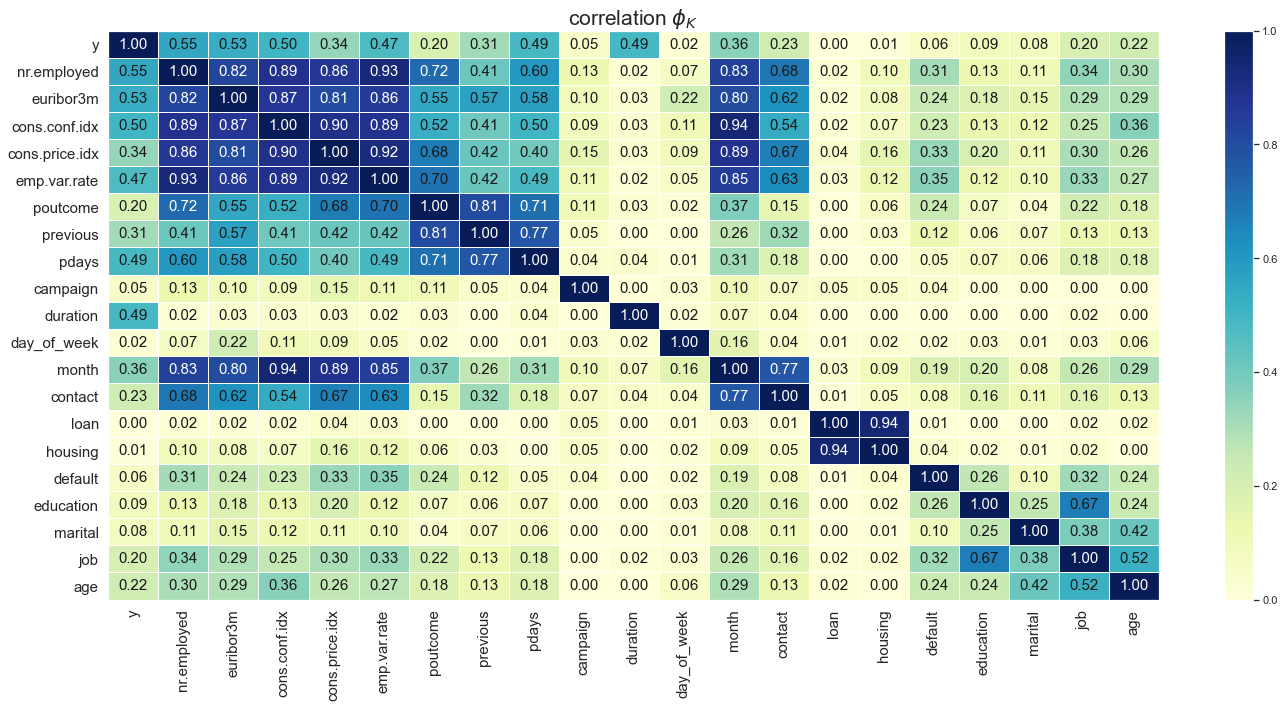

In [398]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="YlGnBu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 10))
plt.tight_layout()

## Kardinalitas Data

In [399]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[67, 95]"
1,job,object,0,0.0,12,"[self-employed, services]"
2,marital,object,0,0.0,4,"[married, single]"
3,education,object,0,0.0,8,"[university.degree, basic.4y]"
4,default,object,0,0.0,3,"[yes, no]"
5,housing,object,0,0.0,3,"[yes, unknown]"
6,loan,object,0,0.0,3,"[no, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[jun, nov]"
9,day_of_week,object,0,0.0,5,"[thu, mon]"


## Data Duplikat

In [400]:
print(df[df.duplicated(keep=False)].shape)
df[df.duplicated(keep=False)]

(24, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Terdapat total 24 kolom yang memiliki value yang sama.

Dataset sudah tidak memiliki data duplikat.

## Mengubah data UNKNOWN menjadi NaN 

In [401]:
list_unknown = []
cat_unknown = []
pct_unk = []
for cat in df.columns:
    if df[cat].dtype == 'object':
        cat_unknown.append(cat)
        list_unknown.append([cat,df[cat][df[cat] == 'unknown'].count(),f'{(df[cat][df[cat] == "unknown"].count()/df[cat].count() * 100).round(2)} %'])
        pct_unk.append(df[cat][df[cat] == 'unknown'].count())

df_unknown = pd.DataFrame(columns=['Column','f Unknown','Unknown %'],data =list_unknown)

df_unknown.sort_values(by = ['f Unknown'],ascending=False)

,Column,f Unknown,Unknown %
3,default,8597,20.87 %
2,education,1731,4.2 %
4,housing,990,2.4 %
5,loan,990,2.4 %
0,job,330,0.8 %
1,marital,80,0.19 %
6,contact,0,0.0 %
7,month,0,0.0 %
8,day_of_week,0,0.0 %
9,poutcome,0,0.0 %


Memperlihatkan jumlah baris dan persentase data unknown di tiap kolom kategorikalnya.

In [402]:
# Replace 'unknown' with NaN in multiple columns
df = df.replace({'unknown': pd.np.nan})

Merubah nilai unknown menjadi Nan.

### Visualisasi Nan dengan MissingNo Library

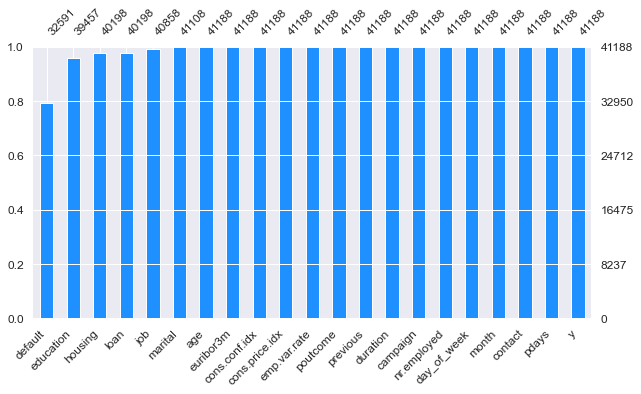

In [403]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

terlihat default, education, housing, loan, job, dan marital memiliki data unknown

<AxesSubplot:>

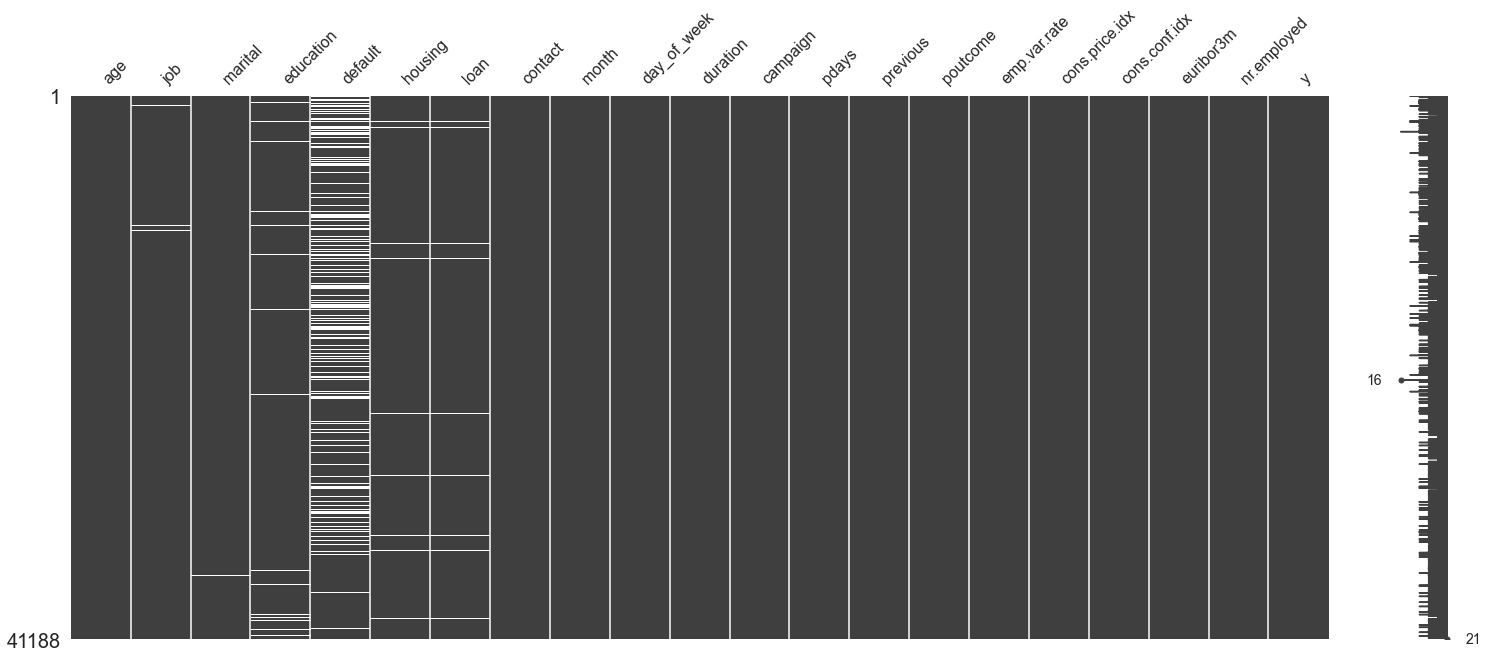

In [404]:
missingno.matrix(df)

In [405]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


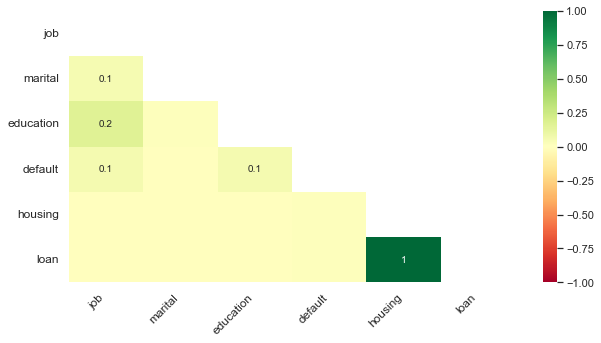

In [406]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

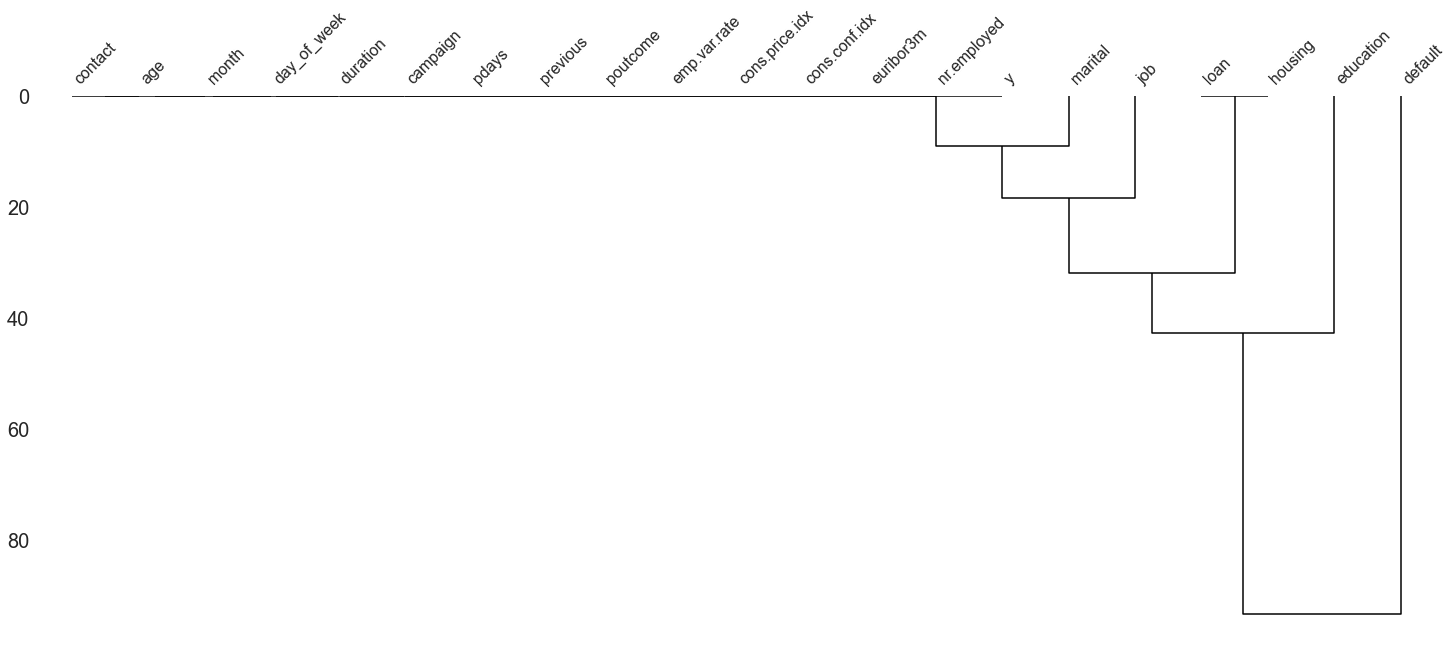

In [407]:
missingno.dendrogram(df)
plt.show()

dari matrix, heatmap dan dendogram diatas dapat disimpulkan bahwa

* data loan dan housing memiliki kekosongan yang sama dimana ini menandakan lebih baik mengisinya dengan data yang sama
* pada kolom default terdapat 20% data yang kosong
* kolom job dan kolom education terdapat korelasi diantara data yang kosongnya.

## Check Outlier

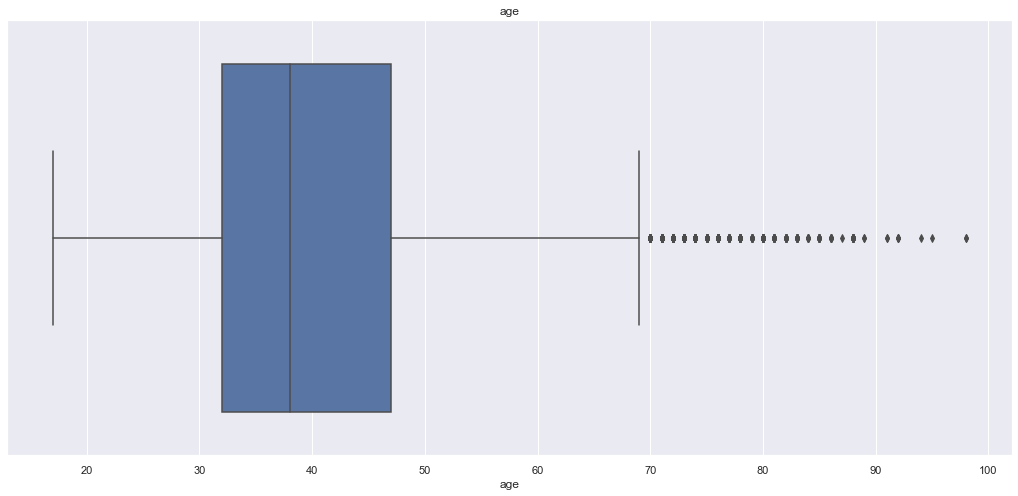

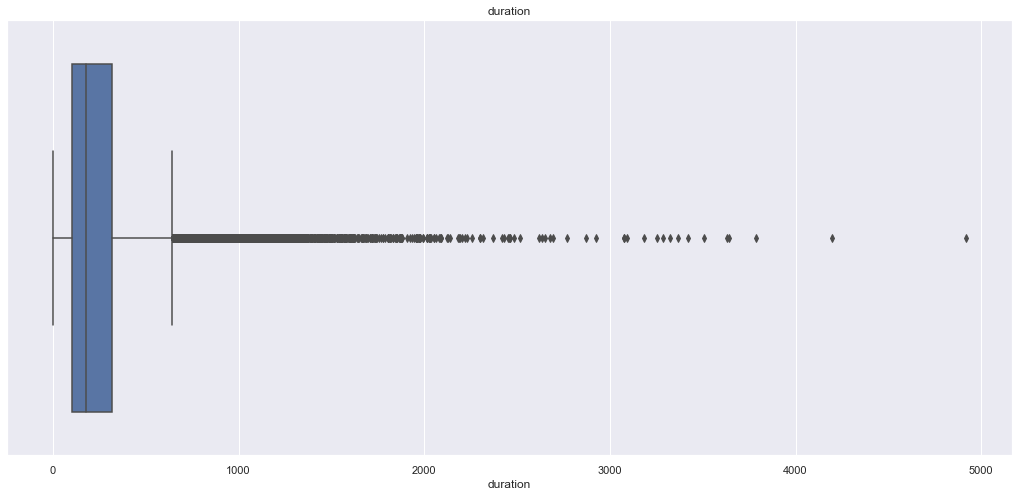

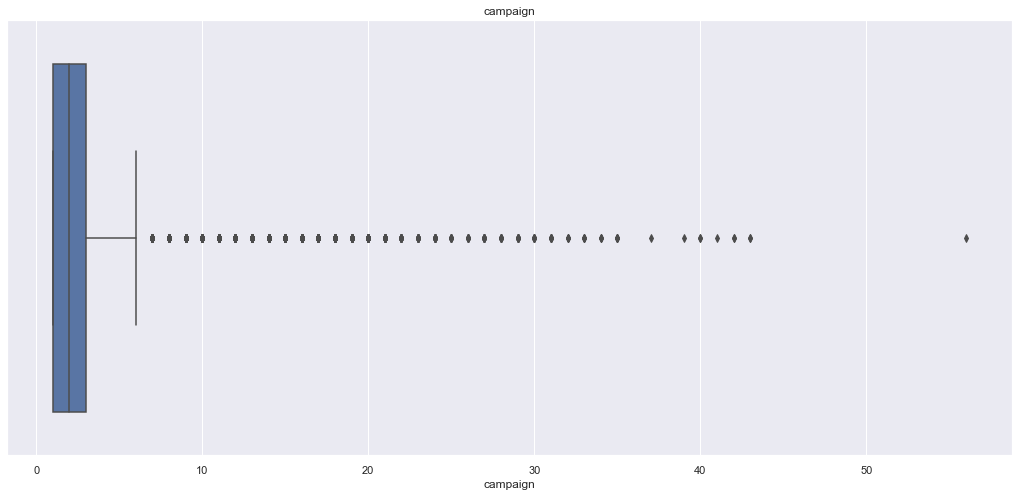

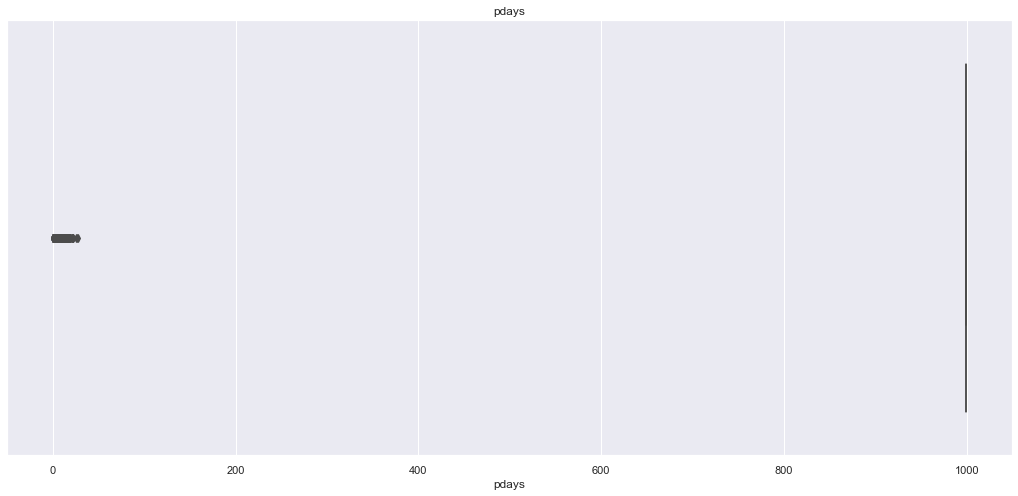

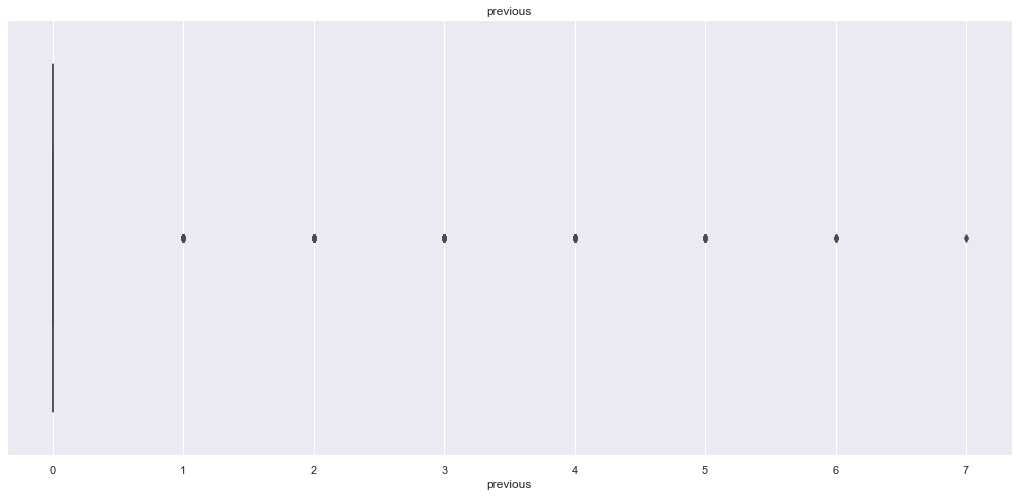

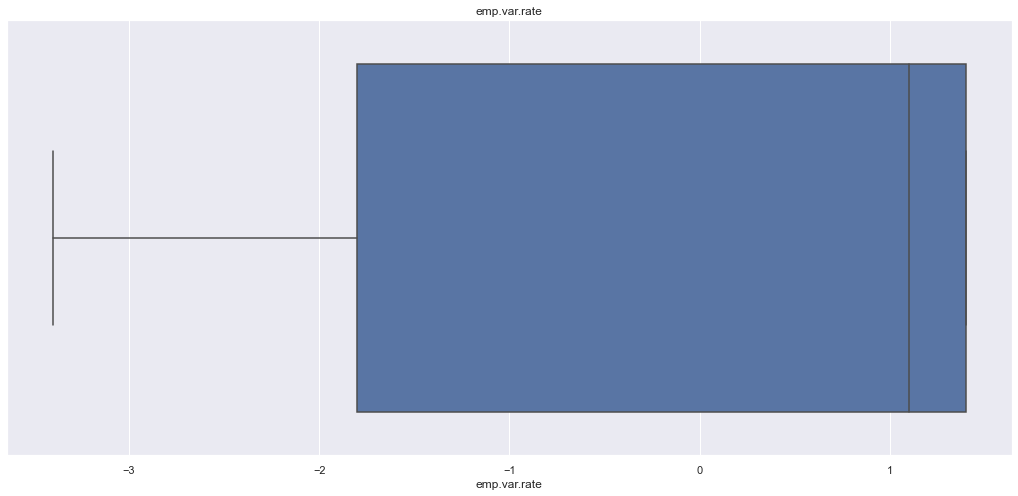

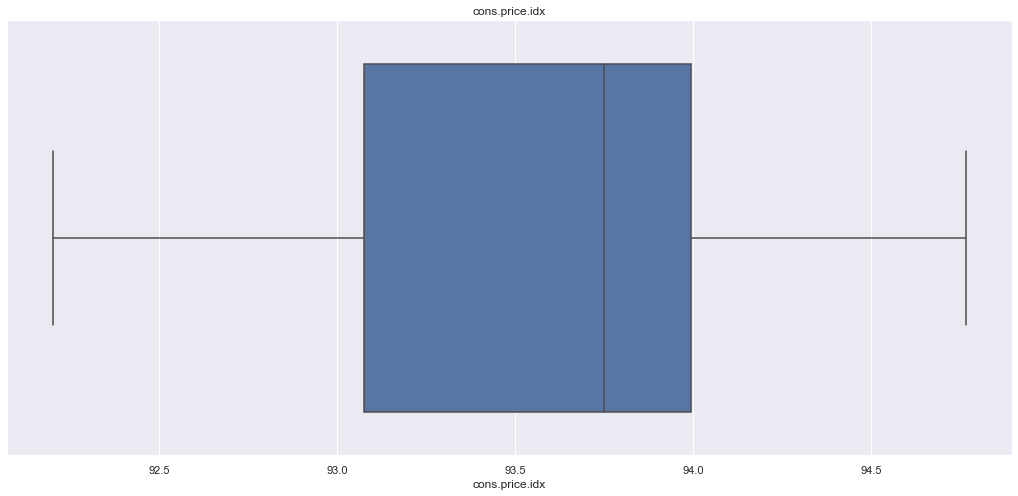

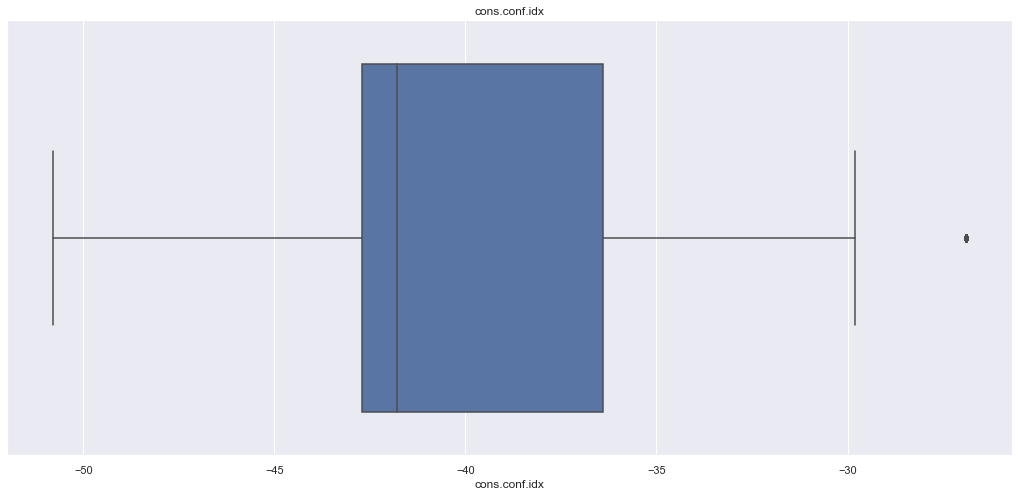

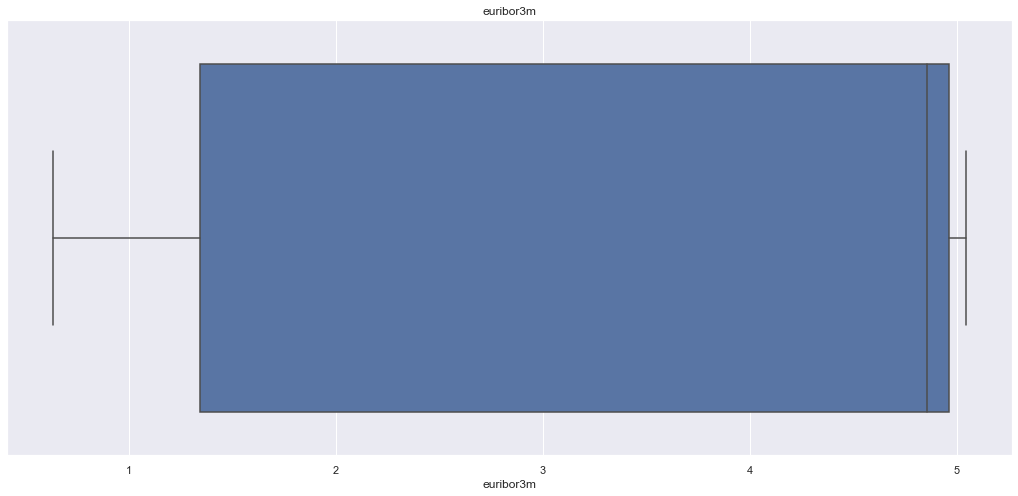

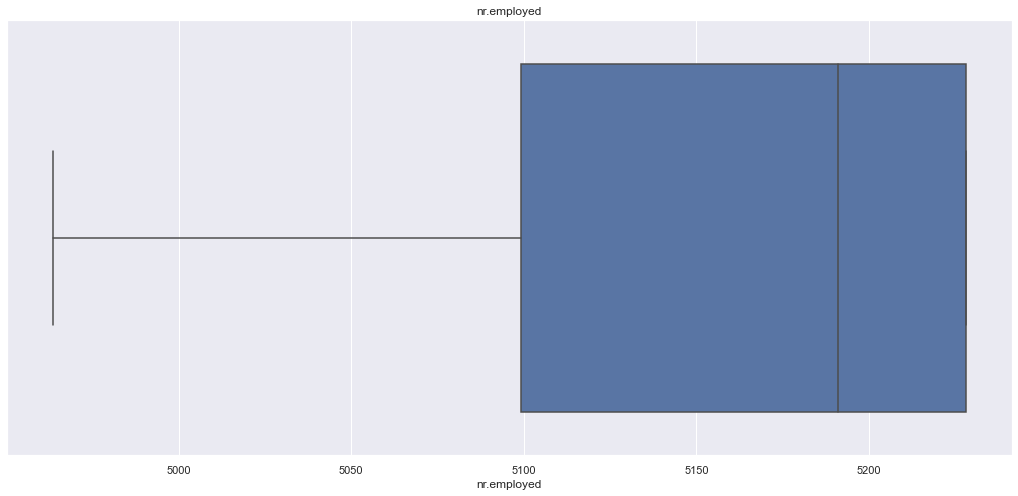

In [408]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# create boxplots for numerical columns
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(col)


In [409]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

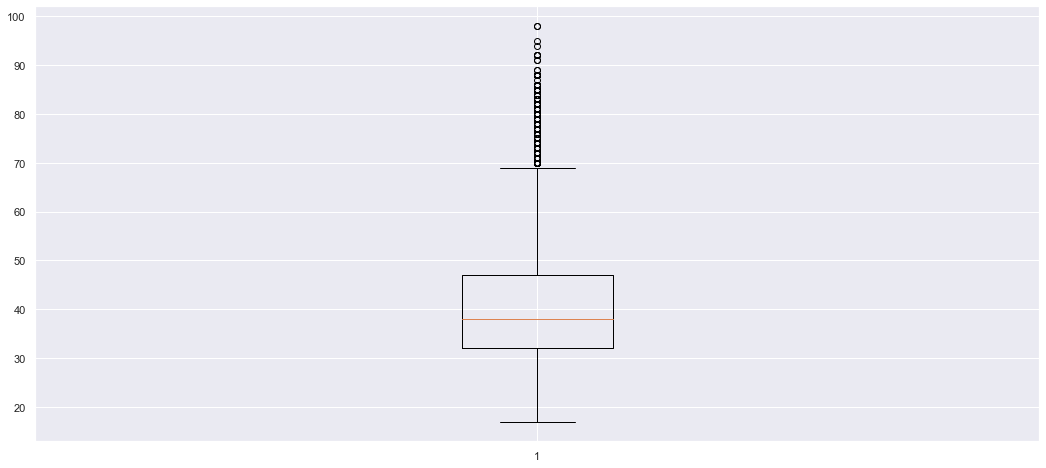

In [410]:
plt.boxplot(df['age'])
plt.show()

In [411]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Jumlah data oulier pada kolom Age : {len(outliers)}")


Jumlah data oulier pada kolom Age : 469


In [412]:
out_all=outliers.pivot_table(columns='age', index=['y'], aggfunc='size')
out_all['Total']=out_all.sum(axis =1)
out_all.sort_values('Total',ascending=False)

age,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,94,95,98,Total
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,28.0,32.0,21.0,21.0,17.0,13.0,16.0,7.0,13.0,7.0,13.0,12.0,6.0,9.0,4.0,8.0,3.0,NaN,13.0,NaN,2.0,1.0,1.0,1.0,NaN,248.0
yes,19.0,21.0,13.0,13.0,15.0,11.0,18.0,13.0,14.0,7.0,18.0,8.0,11.0,8.0,3.0,7.0,5.0,1.0,9.0,2.0,NaN,3.0,NaN,NaN,2.0,221.0


In [413]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})


replace data y dengan 1 = yes dan 0 = no

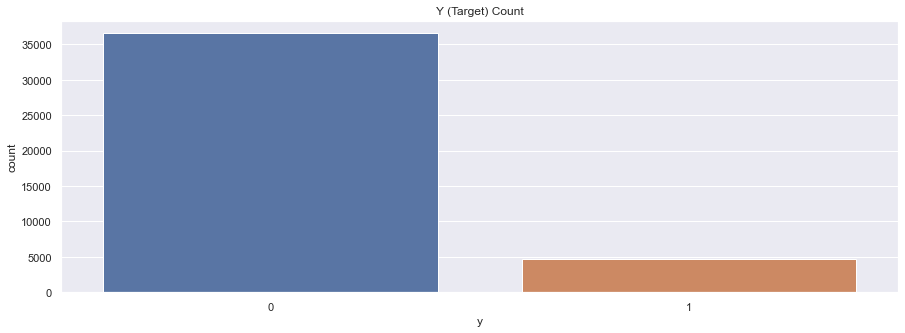

In [414]:
plt.figure(figsize=(15, 5))
sns.countplot(x='y', data=df)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Y (Target) Count')
plt.show()

Dari visualisasi kolom Target dapat dilihat bawah targetnya imbalance.

### Numerical Columns

#### Job

Text(0.5, 1.0, 'Job Count')

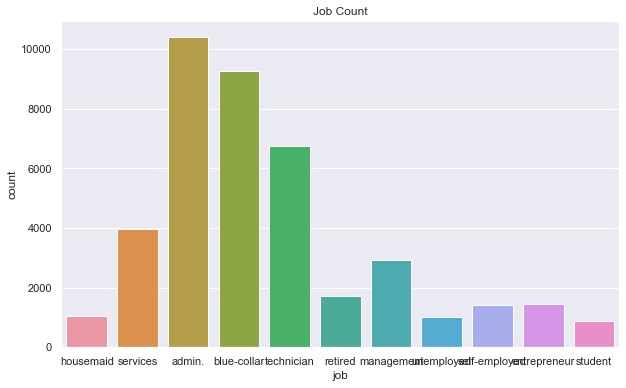

In [415]:
sns.countplot(data = df, x = 'job')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Job Count')

Text(0.5, 1.0, 'Job Count Based on Target')

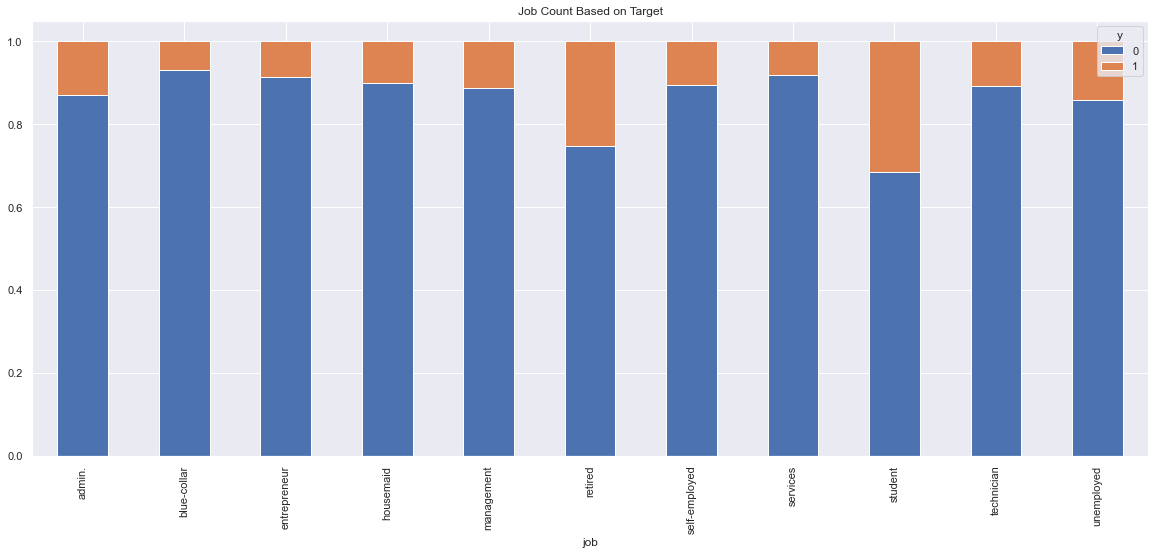

In [416]:
Job=pd.crosstab(df["job"],df['y'])
Job.div(Job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,8))
plt.title('Job Count Based on Target')

Dari visualisasi diatas dapat dilihat bahwa student dan retired memiliki acceptance rate tertinggi terhadap penawaran term deposit.

#### Poutcome

Text(0.5, 1.0, 'P Outcome Count')

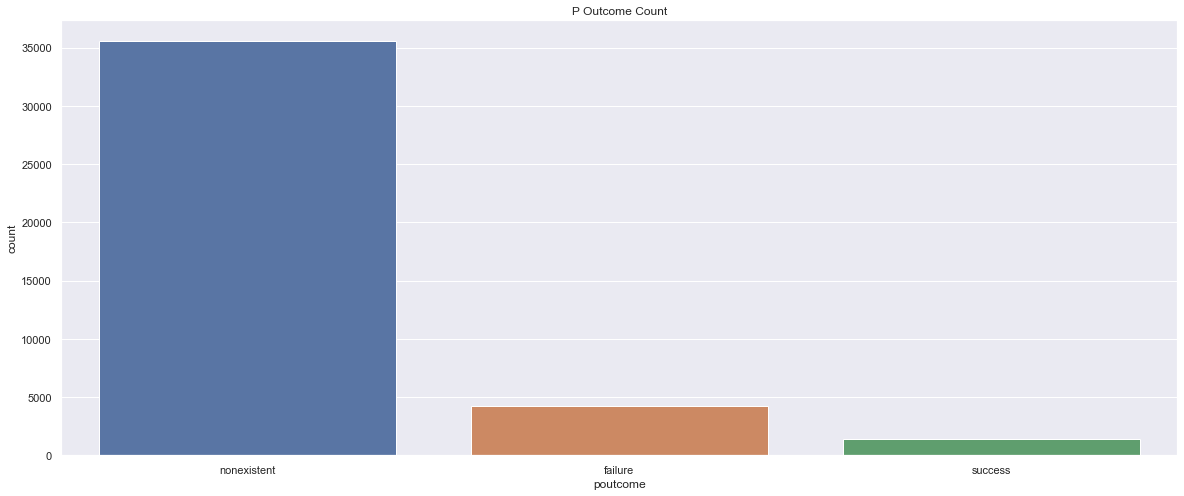

In [417]:
sns.countplot(data = df, x = 'poutcome')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('P Outcome Count')

Text(0.5, 1.0, 'P Outcome Count Based on Target')

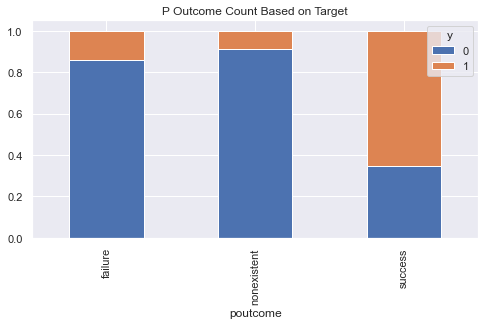

In [418]:
Poutcome=pd.crosstab(df["poutcome"],df['y'])
Poutcome.div(Poutcome.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
sns.set(rc={'figure.figsize':(10,6)})
plt.title('P Outcome Count Based on Target')

Dari visualisasi diatas dapat dilihat bahwa mereja yang succes memiliki kemungkinan terbesar untuk melakukan term deposit.

#### Day of the week

Text(0.5, 1.0, 'Day of the Week Count')

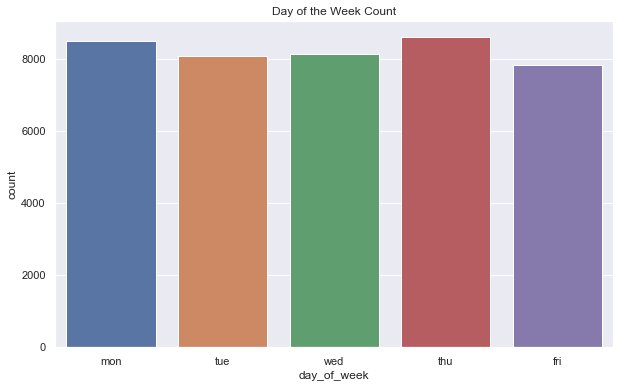

In [419]:
sns.countplot(data = df, x = 'day_of_week')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Day of the Week Count')

Text(0.5, 1.0, 'Day of the Week Count Based on Target')

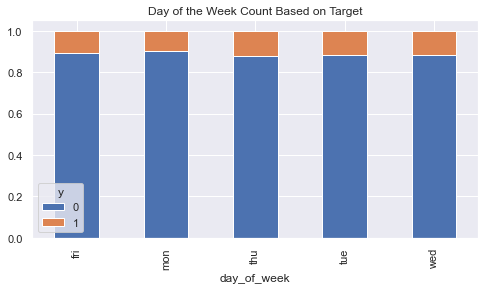

In [420]:
Day=pd.crosstab(df["day_of_week"],df['y'])
Day.div(Day.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Day of the Week Count Based on Target')

dari visualisasi diatas dapat dilihat bahwa penawaran hanya dilakukan di hari kerja

#### Month

Text(0.5, 1.0, 'Month Count')

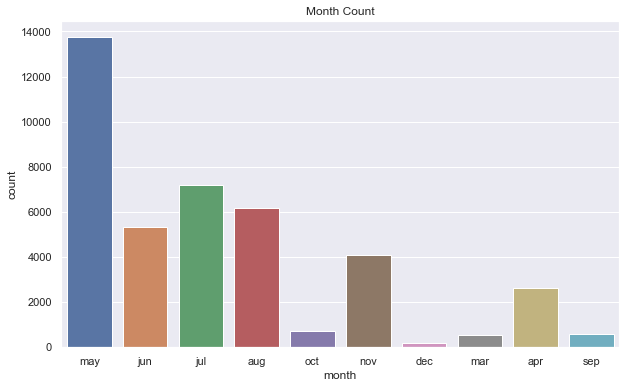

In [421]:
sns.countplot(data = df, x = 'month')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Month Count')

Text(0.5, 1.0, 'Month Count Based on Target')

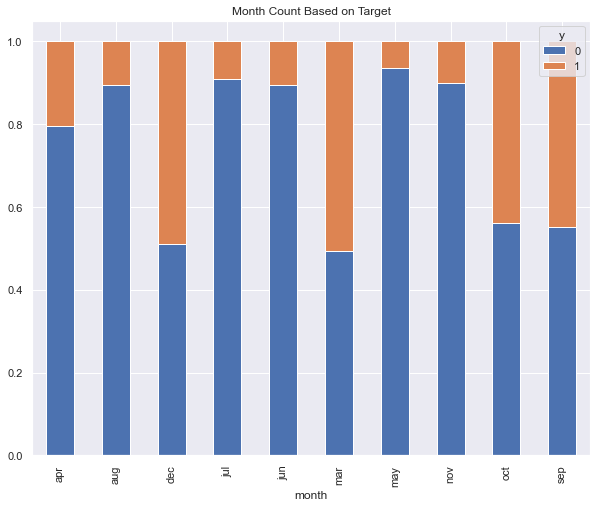

In [422]:
Month=pd.crosstab(df["month"],df['y'])
Month.div(Month.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title('Month Count Based on Target')

dari visualisasi diatas dapat dilihat bahwa proses penawaran paling banyak dilakukan pada bulan Mei, tetapi kemungkinan terbesar seorang nasabah melakukan pembukaan rekening terdapat pada bulan Maret, Desember, Oktober dan September

#### Contact

Text(0.5, 1.0, 'Contact Count')

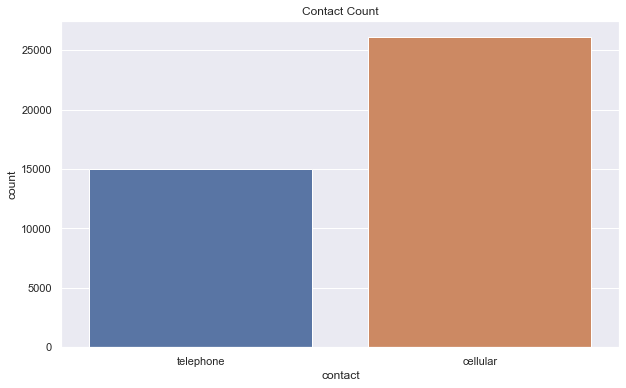

In [423]:
sns.countplot(data = df, x = 'contact')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Contact Count')

Text(0.5, 1.0, 'Contact Count Based on Target')

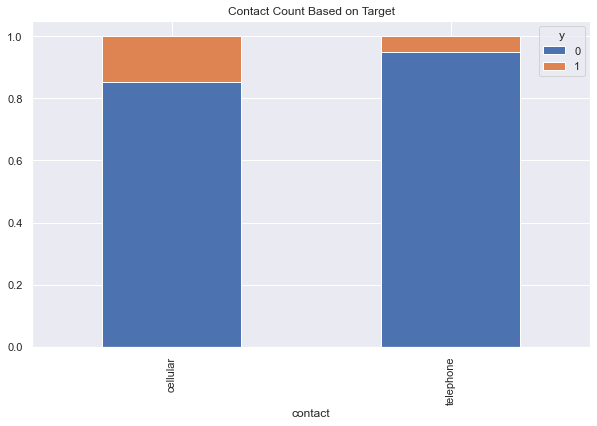

In [424]:
Contact=pd.crosstab(df["contact"],df['y'])
Contact.div(Contact.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Contact Count Based on Target')

#### Marital

Text(0.5, 1.0, 'Marital Count')

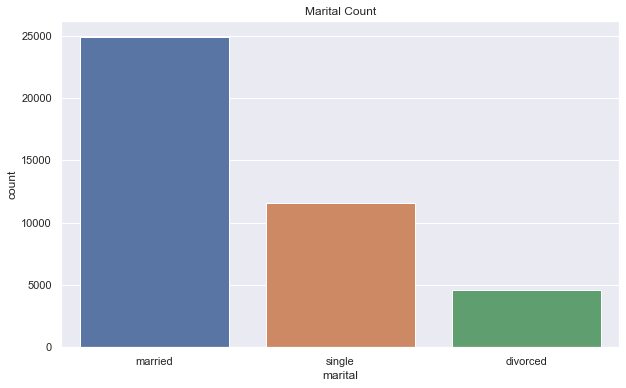

In [425]:
sns.countplot(data = df, x = 'marital')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Marital Count')

Text(0.5, 1.0, 'Marital Count Based on Target')

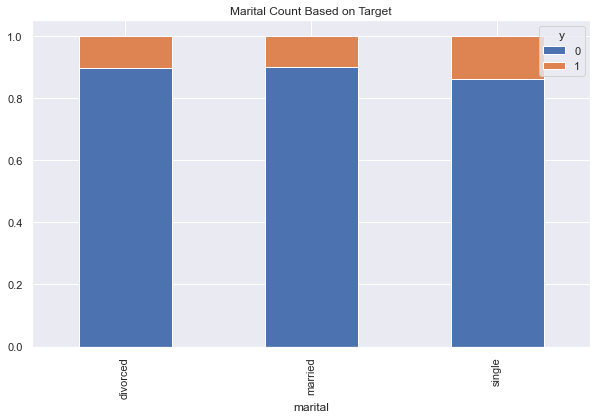

In [426]:
Marital=pd.crosstab(df["marital"],df['y'])
Marital.div(Marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Marital Count Based on Target')

Nasabah yang paling sering dihubungi yang Married, tetapi Nasabah Single memiliki kemungkinan terbesar untuk melakukan pembukaan rekening deposito

#### Loan

Text(0.5, 1.0, 'Loan Count')

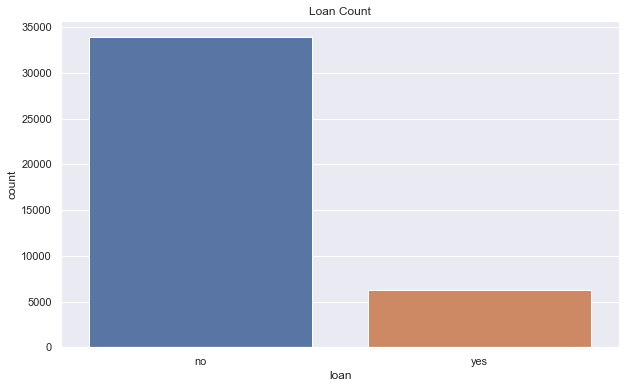

In [427]:
sns.countplot(data = df, x = 'loan')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Loan Count')

Text(0.5, 1.0, 'Loan Count Based on Target')

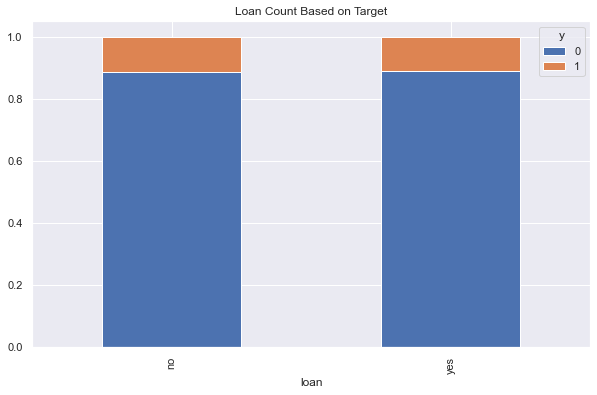

In [428]:
Loan=pd.crosstab(df["loan"],df['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Loan Count Based on Target')

Nasabah yang lebih sering dihubungi adalah mereka yang tidak memiliki loan pada bank, meskipun ada atau tidak adanya loan tidak terlalu mempengaruhi rasio pembukaan rekening deposito.

#### Housing

Text(0.5, 1.0, 'Housing Count')

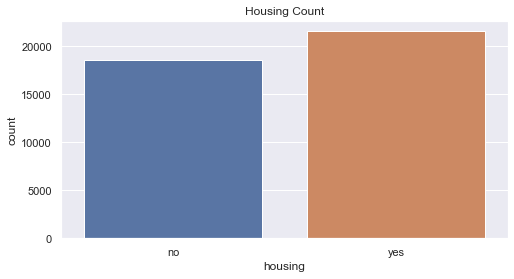

In [429]:
sns.countplot(data = df, x = 'housing')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Housing Count')

Text(0.5, 1.0, 'Housing Count Based on Target')

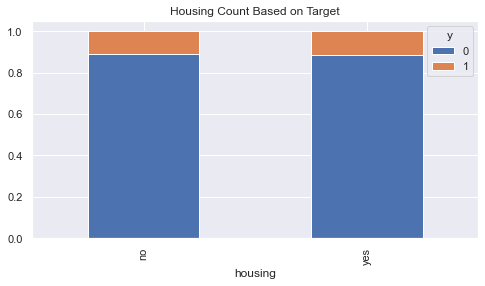

In [430]:
Housing=pd.crosstab(df["housing"],df['y'])
Housing.div(Housing.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Housing Count Based on Target')

Nasabah yang lebih sering dihubungi adalah mereka yang memiliki housing loan pada bank, meskipun ada atau tidak adanya housing loan tidak terlalu mempengaruhi rasio pembukaan rekening deposito.

#### Default

Text(0.5, 1.0, 'Default Count')

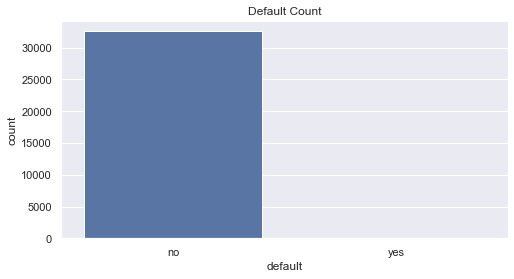

In [431]:
sns.countplot(data = df, x = 'default')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Default Count')

Text(0.5, 1.0, 'Default Count Based on Target')

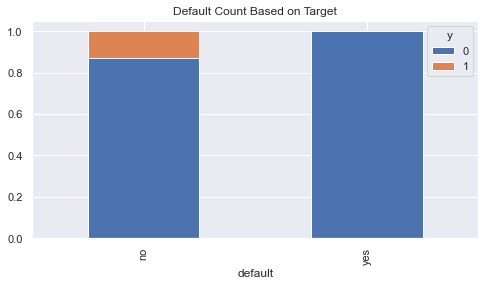

In [432]:
Default=pd.crosstab(df["default"],df['y'])
Default.div(Default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Default Count Based on Target')

Bagi yang default nya memiliki value yes tidak ada yang melakukan pembukaan rekening deposito

#### Education

Text(0.5, 1.0, 'Education')

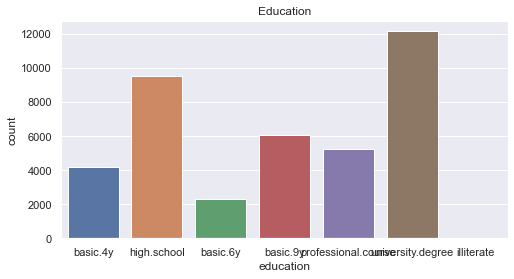

In [433]:
sns.countplot(data = df, x = 'education')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Education')

Text(0.5, 1.0, 'Education Count Based on Target')

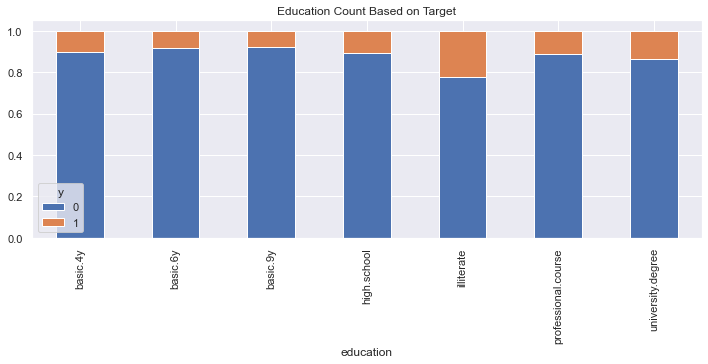

In [434]:
Default=pd.crosstab(df["education"],df['y'])
Default.div(Default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,4))
plt.title('Education Count Based on Target')

Dari visualisasi data dapat dilihat bahwa illiterate memiliki kemungkinan terbesar dalam pembukaan rekening term deposit.

### Numerical Features

In [435]:
num_column = []
lst_nunique = []
for cat in df.columns:
    if df[cat].dtype != 'object' and cat != 'y' :
        num_column.append(cat)
        lst_nunique.append([cat,df[cat].nunique()])

df_num = pd.DataFrame(columns=['Column','f Unique'],data =lst_nunique)

df_num


,Column,f Unique
0,age,78
1,duration,1544
2,campaign,42
3,pdays,27
4,previous,8
5,emp.var.rate,10
6,cons.price.idx,26
7,cons.conf.idx,26
8,euribor3m,316
9,nr.employed,11


#### Number of Employees

Text(0.5, 1.0, 'Number of Employees Distribution based on target')

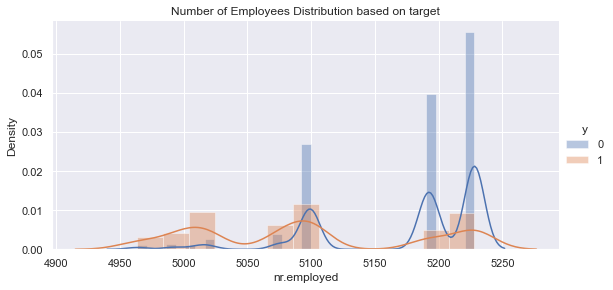

In [436]:
sns.FacetGrid(df, hue='y',height=4, aspect=2).map(sns.distplot, 'nr.employed').add_legend()
plt.title('Number of Employees Distribution based on target')

Text(0.5, 1.0, 'Number of Employees Count')

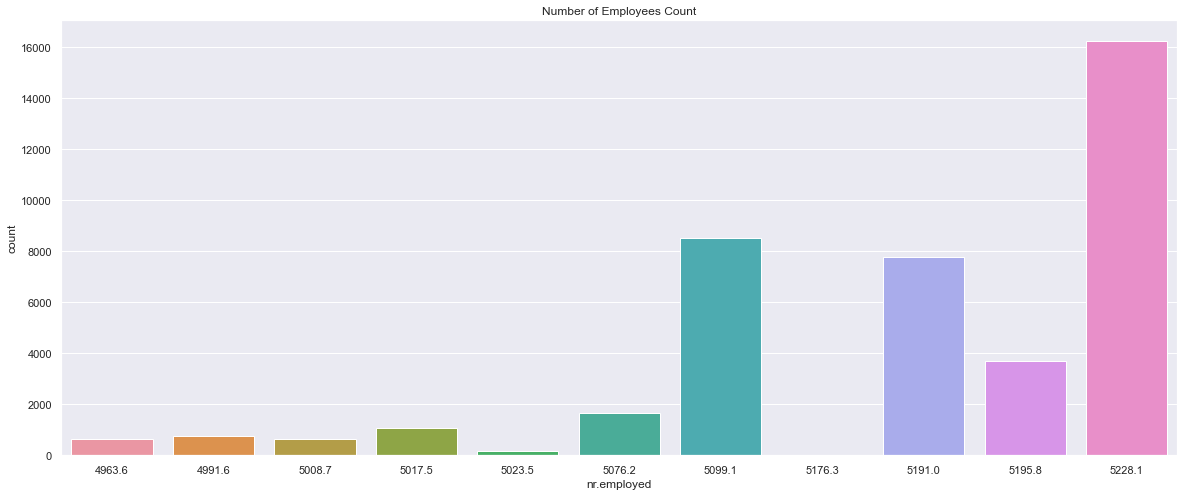

In [437]:
sns.countplot(data = df , x = 'nr.employed')
plt.title('Number of Employees Count')

Text(0.5, 1.0, 'Number of Employees Count based on Target')

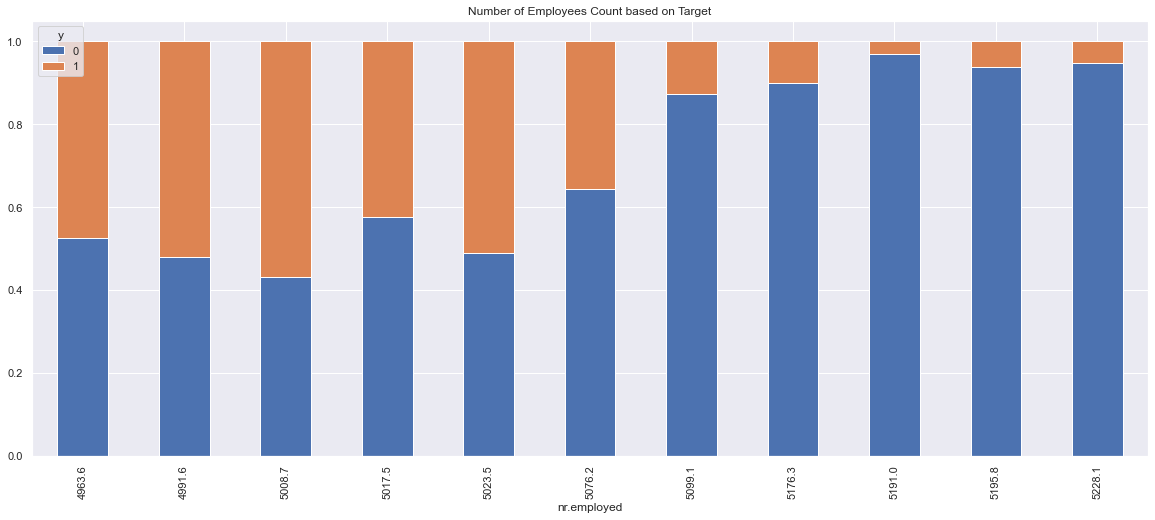

In [438]:
NE=pd.crosstab(df["nr.employed"],df['y'])
NE.div(NE.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Number of Employees Count based on Target')

#### Euro Interbank Offered Rate

Text(0.5, 1.0, 'Euribor3m Distribution based on target')

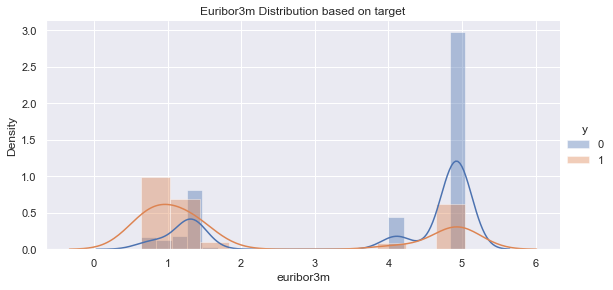

In [439]:
sns.FacetGrid(df, hue='y',height=4, aspect=2).map(sns.distplot, 'euribor3m').add_legend()
plt.title('Euribor3m Distribution based on target')

#### Consumer Confidence

Text(0.5, 1.0, 'Consumer Confidence Distribution based on target')

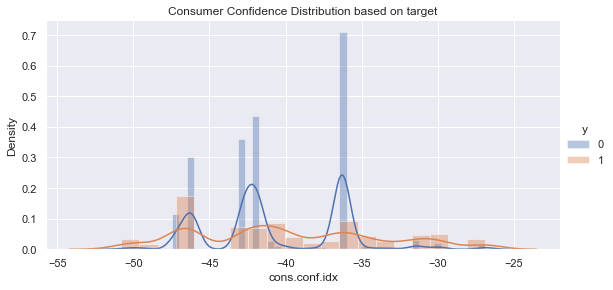

In [440]:
sns.FacetGrid(df, hue='y',height=4, aspect=2).map(sns.distplot, 'cons.conf.idx').add_legend()
plt.title('Consumer Confidence Distribution based on target')

In [441]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

#### Consumer Price

Text(0.5, 1.0, 'Consumer Confidence Index Distribution based on target')

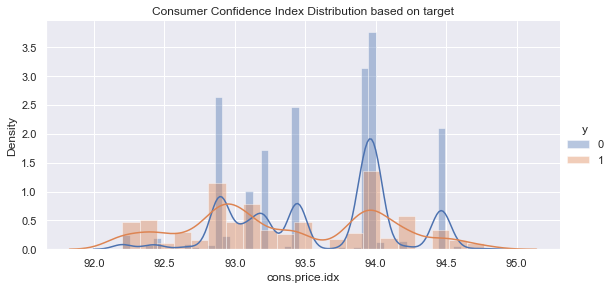

In [442]:
sns.FacetGrid(df, hue='y',height=4, aspect=2).map(sns.distplot, 'cons.price.idx').add_legend()
plt.title('Consumer Confidence Index Distribution based on target')

#### Employment Variation Rate

Text(0.5, 1.0, 'Employee Variation Rate Distribution based on target')

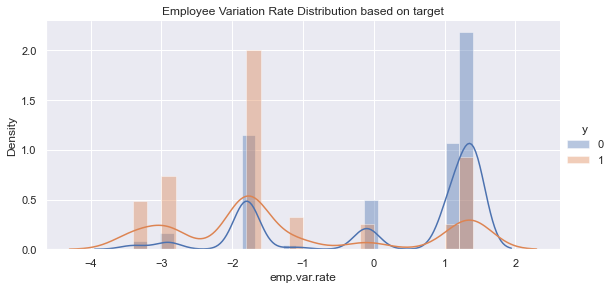

In [443]:
sns.FacetGrid(df, hue='y',height=4, aspect=2).map(sns.distplot, 'emp.var.rate').add_legend()
plt.title('Employee Variation Rate Distribution based on target')

In [444]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

#### Previous

Text(0.5, 1.0, 'Previous Count')

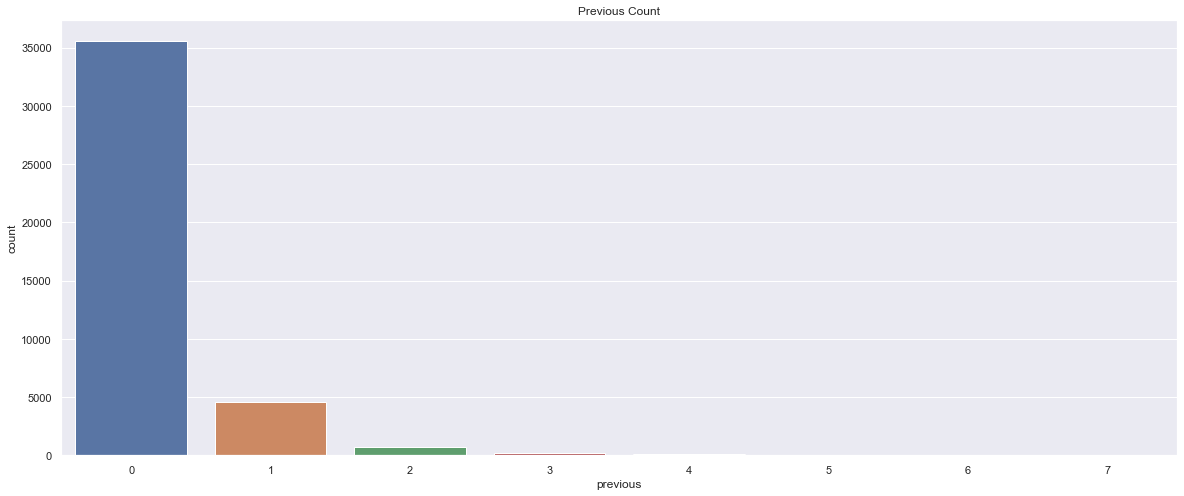

In [445]:
sns.countplot(data = df , x = 'previous')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Previous Count')

Text(0.5, 1.0, 'Previous Count based on Target')

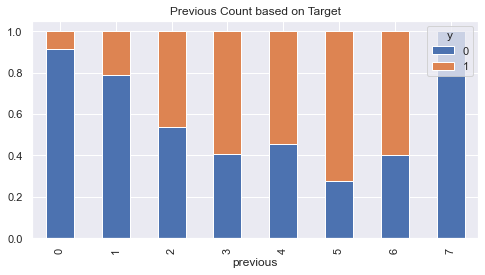

In [446]:
Previous=pd.crosstab(df["previous"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Previous Count based on Target')

Dari visualisasi diatas dilihat bahwa maksimal pihak bank melakukan 7 kali kontak sebelum kampanye pembukaan term deposit terhadap seorang nasabah.

#### pdays

Text(0.5, 1.0, 'Pdays Box Plot')

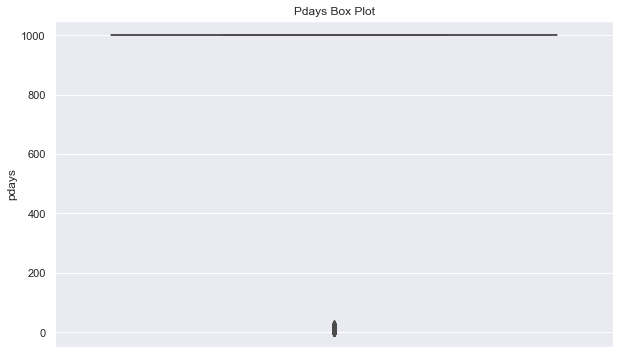

In [447]:
sns.boxplot(data = df , y = 'pdays')
plt.title('Pdays Box Plot')

Text(0.5, 1.0, 'Pdays Count')

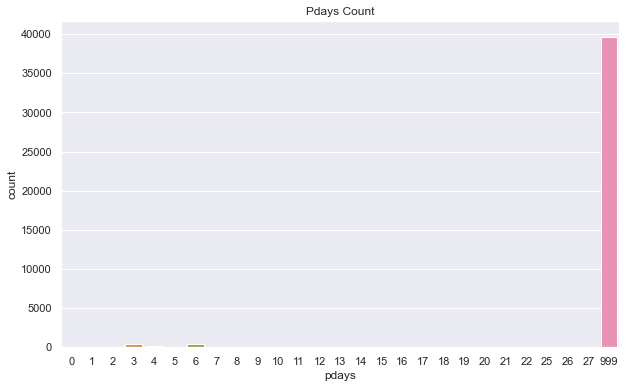

In [448]:
sns.countplot(data = df , x = 'pdays')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Pdays Count')

Text(0.5, 1.0, 'Pdays Count based on Target')

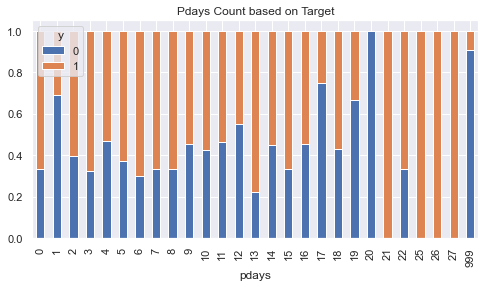

In [449]:
Previous=pd.crosstab(df["pdays"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Pdays Count based on Target')

In [450]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

Dari visualisasi diatas dapat dilihat bahwa kolom pdays memiliki lompatan nilai yang jauh dari 27 ke 999, hal ini dikarenakan untuk 999 merupakan label untuk nasabah yang belum menerima penawaran sebelumnya.

#### Campaign

Text(0.5, 1.0, 'Campaign Boxplot')

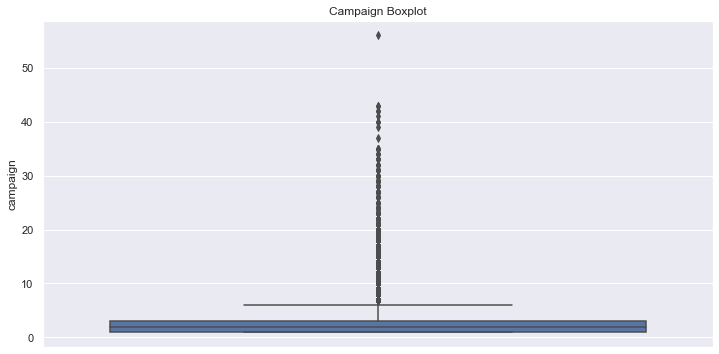

In [451]:
sns.boxplot(data = df , y = 'campaign')
plt.title('Campaign Boxplot')

Text(0.5, 1.0, 'Pdays Count')

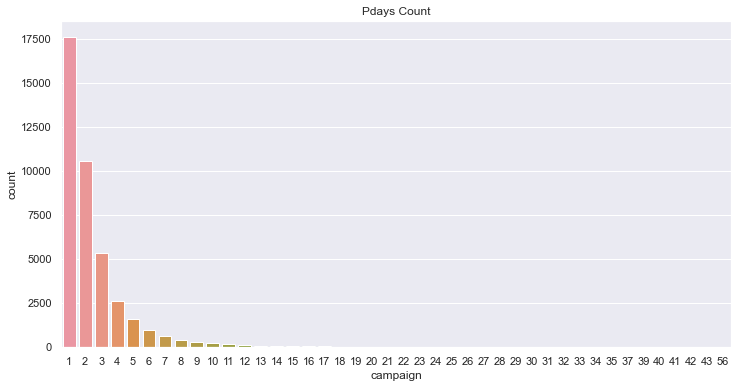

In [452]:
sns.countplot(data = df , x = 'campaign')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Pdays Count')

Text(0.5, 1.0, 'Pdays count based on target')

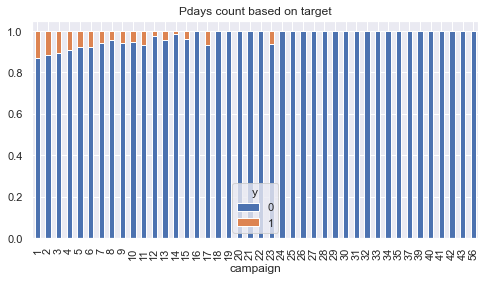

In [453]:
Previous=pd.crosstab(df["campaign"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(18,8)})
plt.title('Pdays count based on target')

#### Age

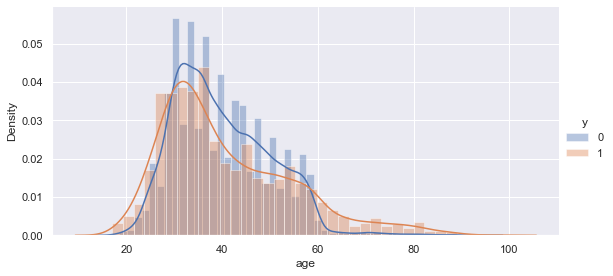

In [454]:
sns.FacetGrid(df, hue='y',height=4,aspect=2).map(sns.distplot, 'age').add_legend()

#### Duration

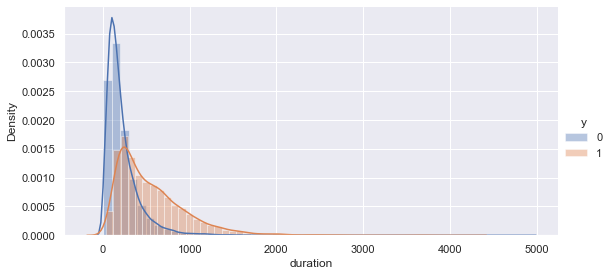

In [455]:
sns.FacetGrid(df, hue='y',height=4,aspect=2).map(sns.distplot, 'duration').add_legend()

Semakin lama durasi maka semakin besar probabilitas seorang nasabah melakukan pembukaan rekening term deposit.

#

## Preprocessing

In [456]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Handling Duplicate

In [457]:
df.drop_duplicates(keep='last',inplace=True)

Menghapus data duplikat dengan menyimpan hanya 1 kemunculannya, yaitu yang terakhir.

In [458]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


### Handling Missing Values

In [459]:
df.drop(columns = 'default',inplace=True)

In [460]:
df.dropna(inplace=True)

In [461]:
df.shape

(38234, 20)

### Feature Engineering

In [462]:
df.drop(columns= ['duration'],inplace=True)

#### Education

basic education di grouping menjadi basic education.  https://eurydice.eacea.ec.europa.eu/national-education-systems/portugal/organisation-education-system-and-its-structure

In [463]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "basic.education"

df['education'].value_counts()

basic.education        12061
university.degree      11817
high.school             9241
professional.course     5097
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

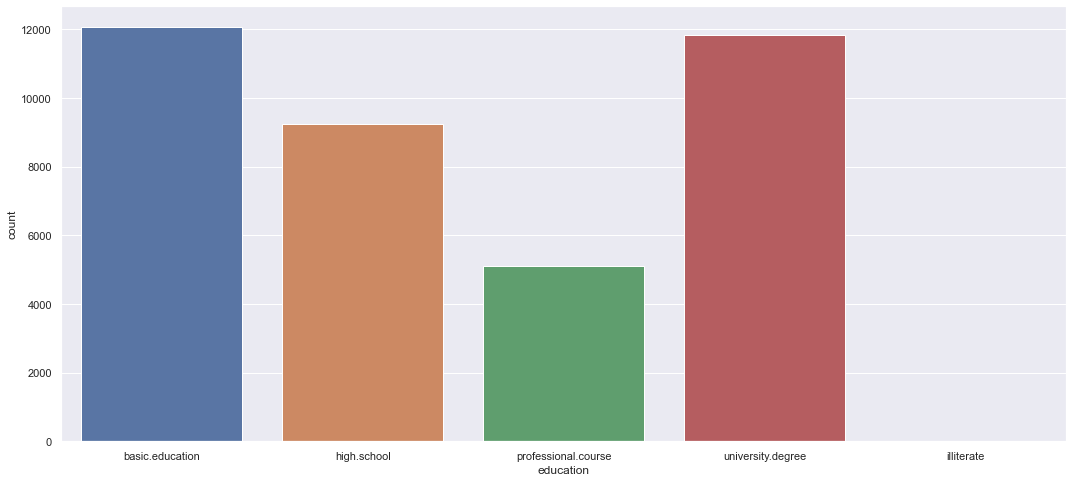

In [464]:
sns.countplot(data = df, x = 'education')

<AxesSubplot:xlabel='education'>

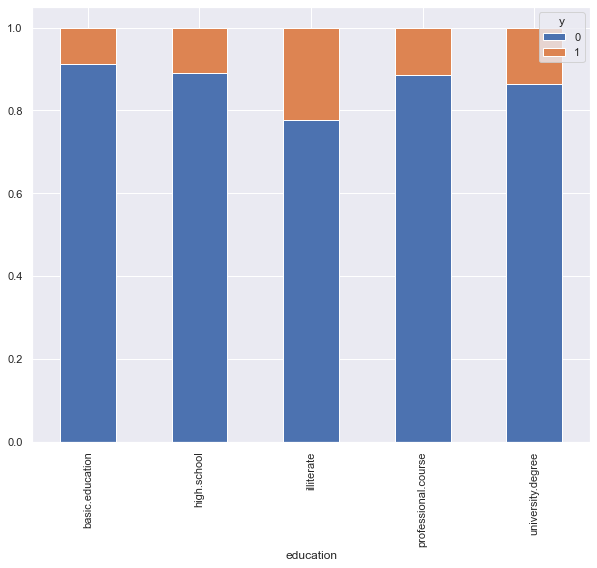

In [465]:
Education=pd.crosstab(df["education"],df['y'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))

Terlihat dari tiap edukasinya bahwa yang illiterate memiliki kemungkinan terbesar untuk membuka deposito

#### Pdays

In [466]:
df['pdays'] = ["Contacted" if v != 999 else 'Not Contacted' for v in df['pdays']]

Merubah nilai 999 menjadi Not Contacted dan data lainnya menjadi Contacted

In [467]:
df['pdays'].value_counts()

Not Contacted    36868
Contacted         1366
Name: pdays, dtype: int64

<AxesSubplot:xlabel='pdays', ylabel='count'>

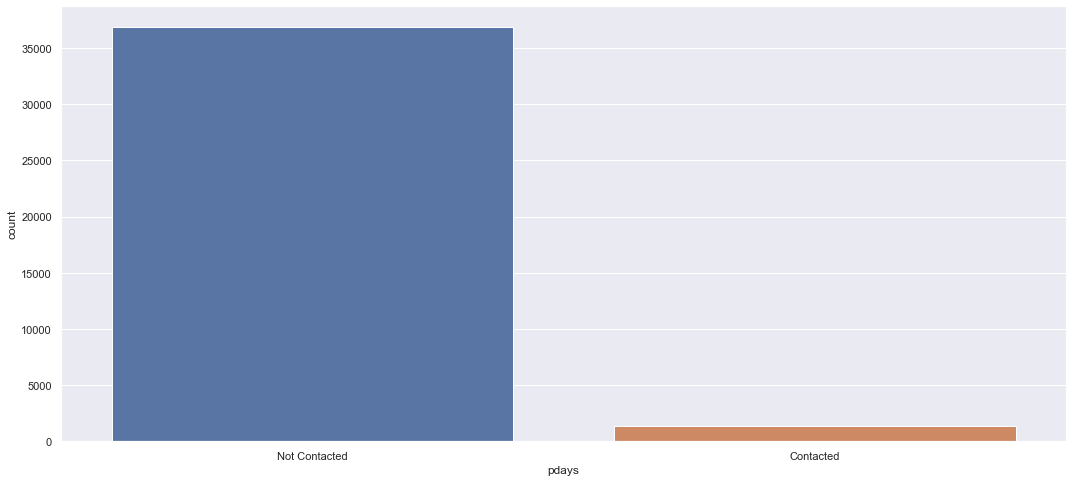

In [468]:
sns.countplot(data = df, x = 'pdays')

Text(0.5, 1.0, 'Pdays count based on target')

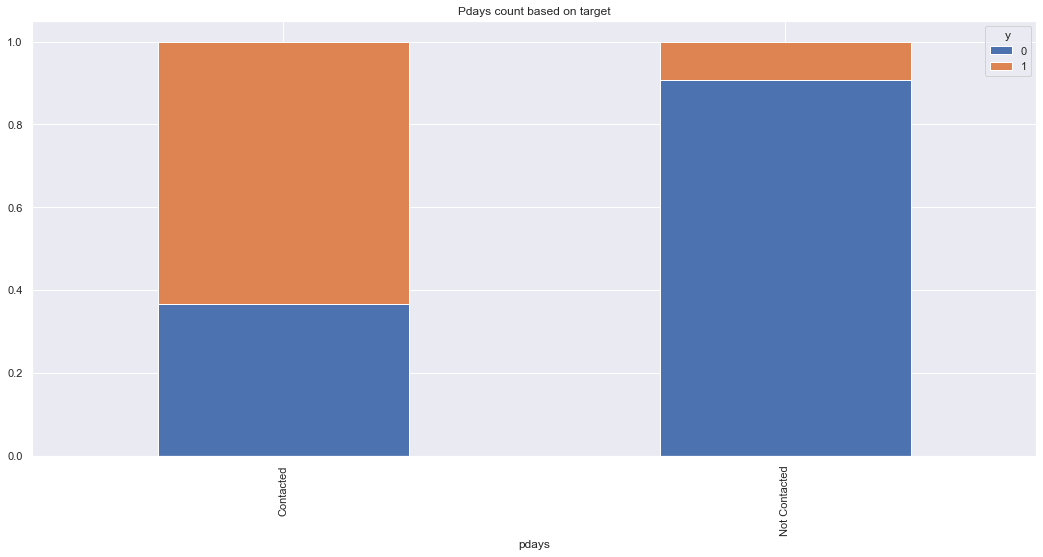

In [469]:
Previous=pd.crosstab(df["pdays"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(18,8)})
plt.title('Pdays count based on target')

Menurut Visualisasi diatas mereka yang telah dikontak memiliki kemungkinan lebih besar untuk membuka rekening term deposit.

#### Campaign

Text(0.5, 1.0, 'Campaign Boxplot with Outlier')

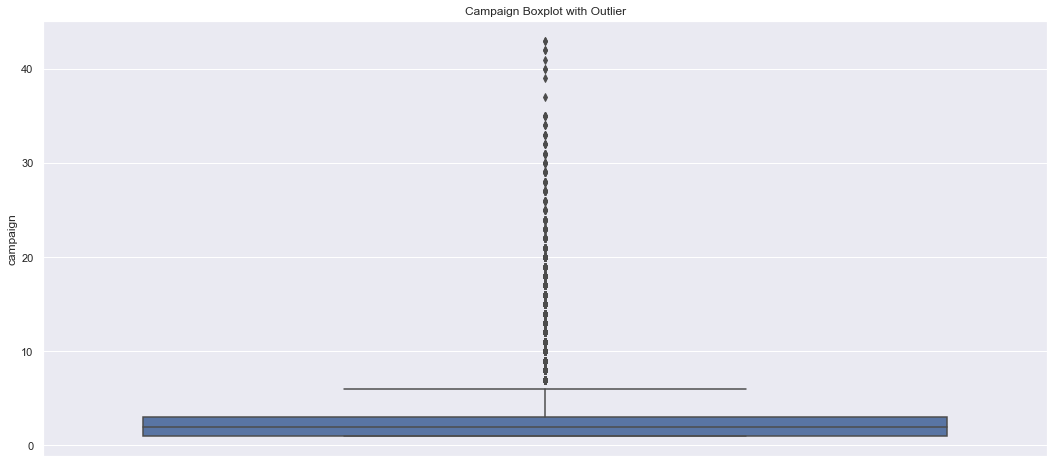

In [470]:
sns.boxplot(data=df , y = 'campaign')
plt.title('Campaign Boxplot with Outlier')

In [471]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['campaign'] >= Q1 - 1.5 * IQR) & (df['campaign'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]

Text(0.5, 1.0, 'Campaign Boxplot without Outlier')

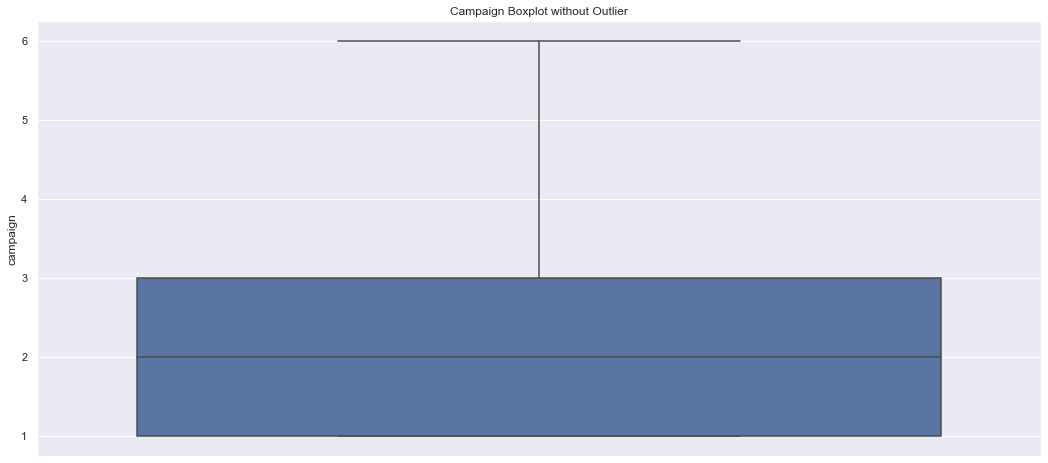

In [472]:
sns.boxplot(data = df , y = 'campaign')
plt.title('Campaign Boxplot without Outlier')

<AxesSubplot:xlabel='campaign', ylabel='count'>

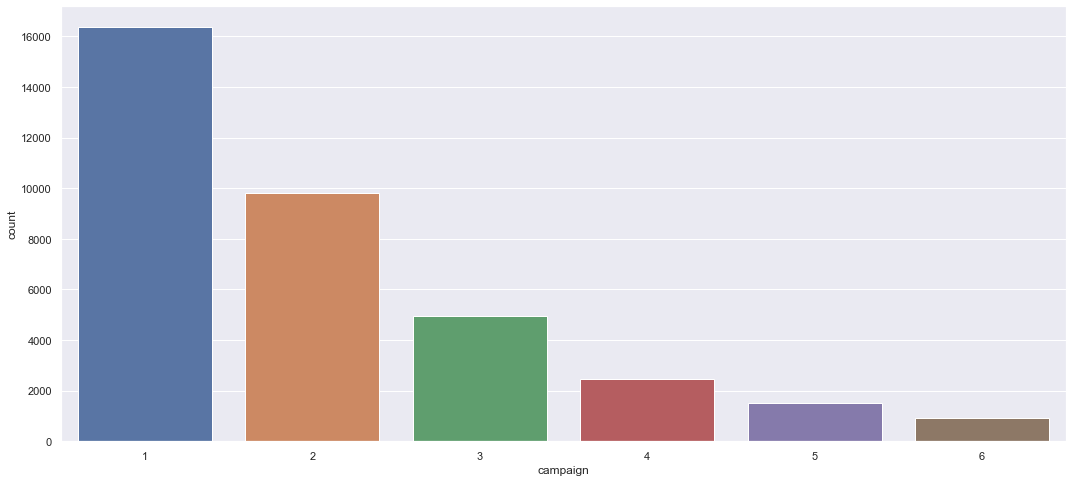

In [473]:
sns.countplot(data = df, x= 'campaign')

Text(0.5, 1.0, 'Campaign count based on target')

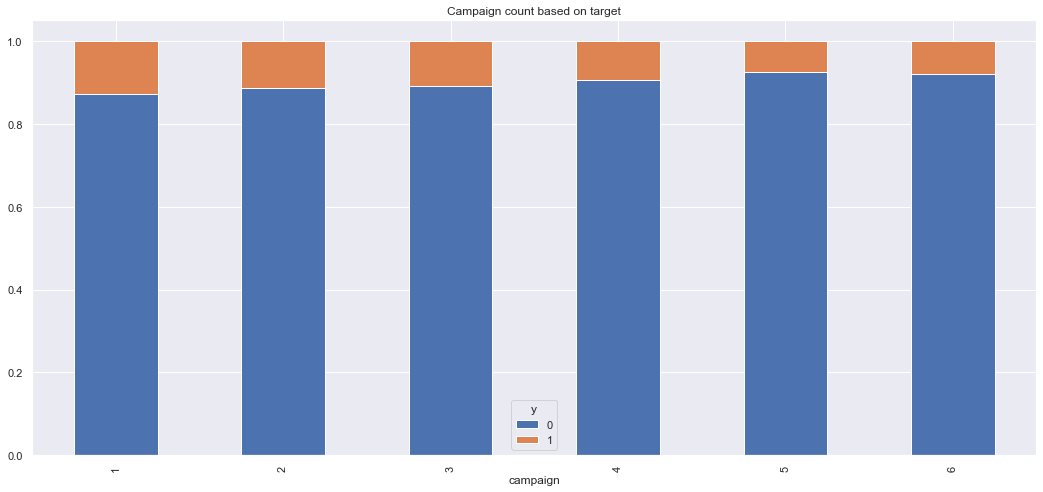

In [474]:
Previous=pd.crosstab(df["campaign"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(18,8)})
plt.title('Campaign count based on target')

In [475]:
df['campaign'] = df['campaign'].astype('O')

Data outlier pada kolom campaign dibuang karena kita ingin meningkatkan jumlah penerimaan penawaran pembukaan rekening term deposit, dengan meminimalkan jumlah kontak penawaran yang dibutuhkan

#### Age

Melakuakan Grouping berdasarka rentang usia

In [476]:
df['age'].nunique()

77

In [477]:
#Grouping by Range
def age(dataframe):
    q1 = 20
    q2 = 30
    q3 = 40
    q4 = 50
    q5 = 60
    q6 = 70
    
    dataframe.loc[(dataframe['age'] < q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] >= q1) & (dataframe['age'] < q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] >= q2) & (dataframe['age'] < q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] >= q3) & (dataframe['age'] < q4), 'age'] = 4
    dataframe.loc[(dataframe['age'] >= q4) & (dataframe['age'] < q5), 'age'] = 5
    dataframe.loc[(dataframe['age'] >= q5) & (dataframe['age'] < q6), 'age'] = 6
    dataframe.loc[(dataframe['age'] >= q6), 'age'] = 7
     
    return dataframe
age(df)

df.head(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.education,no,no,telephone,may,mon,1,Not Contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,5,services,married,high.school,no,no,telephone,may,mon,1,Not Contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,3,services,married,high.school,yes,no,telephone,may,mon,1,Not Contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,4,admin.,married,basic.education,no,no,telephone,may,mon,1,Not Contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,5,services,married,high.school,no,yes,telephone,may,mon,1,Not Contacted,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [478]:
df['age'] = df['age'].astype('O')

<AxesSubplot:xlabel='age'>

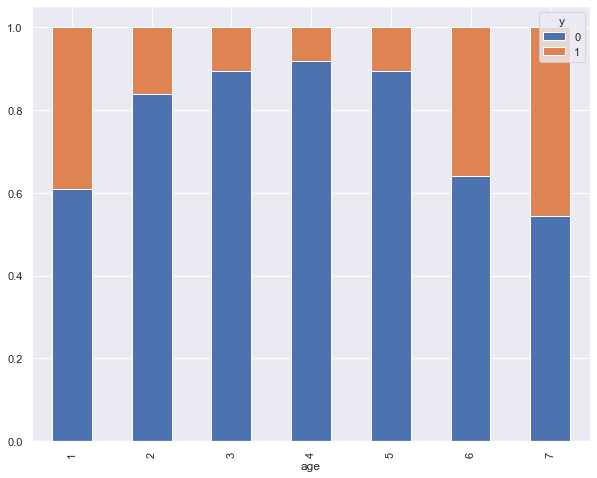

In [479]:
Age=pd.crosstab(df["age"],df['y'])
Age.div(Age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))

Berdasarkan visualisi dapat dilihat bawah rentang usia dibawah 20 dan diatas 60 memiliki kemungkinan paling besar untuk melakukan pembukaan rekening deposito.

#### Encoding

In [480]:
lst_object = []

for i in df.columns:
    if df[i].dtype == 'O':
        lst_object.append([i,df[i].nunique(),list(df[i].drop_duplicates().sample(2).values)])
        
pd.DataFrame(data=lst_object,columns=['Columns', 'N Unique','Unique Sample']).sort_values(by=['N Unique']).reset_index()

,index,Columns,N Unique,Unique Sample
0,4,housing,2,"[yes, no]"
1,5,loan,2,"[no, yes]"
2,6,contact,2,"[telephone, cellular]"
3,10,pdays,2,"[Not Contacted, Contacted]"
4,2,marital,3,"[single, divorced]"
5,11,poutcome,3,"[success, failure]"
6,3,education,5,"[illiterate, basic.education]"
7,8,day_of_week,5,"[mon, tue]"
8,9,campaign,6,"[1, 2]"
9,0,age,7,"[5, 2]"


##### 

In [481]:
# Housing
df['housing'] = df['housing'].replace({'no':0,'yes':1})

# Loan
df['loan'] = df['loan'].replace({'no':0,'yes':1})

# Pdays
df['pdays'] = df['pdays'].replace({'Not Contacted':0,'Contacted':1})

In [482]:
df['education'].unique()

array(['basic.education', 'high.school', 'professional.course',
       'university.degree', 'illiterate'], dtype=object)

In [483]:
# Education
df['education'] = df['education'].replace({'illiterate':0,
                                           'basic.education':1,
                                           'high.school':2,
                                           'university.degree':3,
                                           'professional.course':4})


In [484]:
# Month
month_encoder = df['month'].value_counts().to_dict()
df['month'] = df['month'].map(month_encoder)

In [485]:
# Job
job_encoder = df['job'].value_counts().to_dict()
df['job'] = df['job'].map(job_encoder)

In [486]:
df = pd.get_dummies(df)

In [487]:
df.head()

,job,education,housing,loan,month,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_1,age_2,age_3,age_4,age_5,age_6,age_7,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_failure,poutcome_nonexistent,poutcome_success
0,920,1,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,3503,2,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,3503,2,1,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,9333,1,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,3503,2,0,1,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [488]:
df.shape

(36014, 39)

In [489]:
df

,job,education,housing,loan,month,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_1,age_2,age_3,age_4,age_5,age_6,age_7,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_failure,poutcome_nonexistent,poutcome_success
0,920,1,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,3503,2,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,3503,2,1,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,9333,1,0,0,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,3503,2,0,1,12177,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1497,4,1,0,3829,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,8080,4,0,0,3829,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,1497,3,1,0,3829,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
41186,5988,4,0,0,3829,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


#### Scaling

In [490]:
# # change the range of Var Rate
# df['emp.var.rate'] = df['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
# df['emp.var.rate'] = df['emp.var.rate'] * -1
# df['emp.var.rate'] = df['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# # Multiply consumer index 
# df['cons.price.idx'] = (df['cons.price.idx'] * 10).astype('uint8')

# # change the sign (we want all be positive values)
# df['cons.conf.idx'] = df['cons.conf.idx'] * -1

# # re-scale variables
# df['nr.employed'] = np.log2(df['nr.employed']).astype('uint8')
# df['cons.price.idx'] = np.log2(df['cons.price.idx']).astype('uint8')
# df['cons.conf.idx'] = np.log2(df['cons.conf.idx']).astype('uint8')
# df['job'] = np.log2(df['job']).astype('uint8')
# df['month'] = np.log2(df['month']).astype('uint8')

# # less space
# df.euribor3m = df.euribor3m.astype('uint8')

data = df.drop('y', axis=1)
df_norm = (data-data.min())/(data.max()-data.min())
df_norm = pd.concat((df_norm, df.y), 1)
df = df_norm

In [491]:
df

,job,education,housing,loan,month,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_1,age_2,age_3,age_4,age_5,age_6,age_7,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.029307,0.25,0.0,0.0,1.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.327334,0.50,0.0,0.0,1.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.327334,0.50,1.0,0.0,1.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.000000,0.25,0.0,0.0,1.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.327334,0.50,0.0,1.0,1.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.095881,1.00,1.0,0.0,0.305375,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
41184,0.855429,1.00,0.0,0.0,0.305375,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41185,0.095881,0.75,1.0,0.0,0.305375,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41186,0.614053,1.00,0.0,0.0,0.305375,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [492]:
df.shape

(36014, 39)

### Feature Selection

<AxesSubplot:>

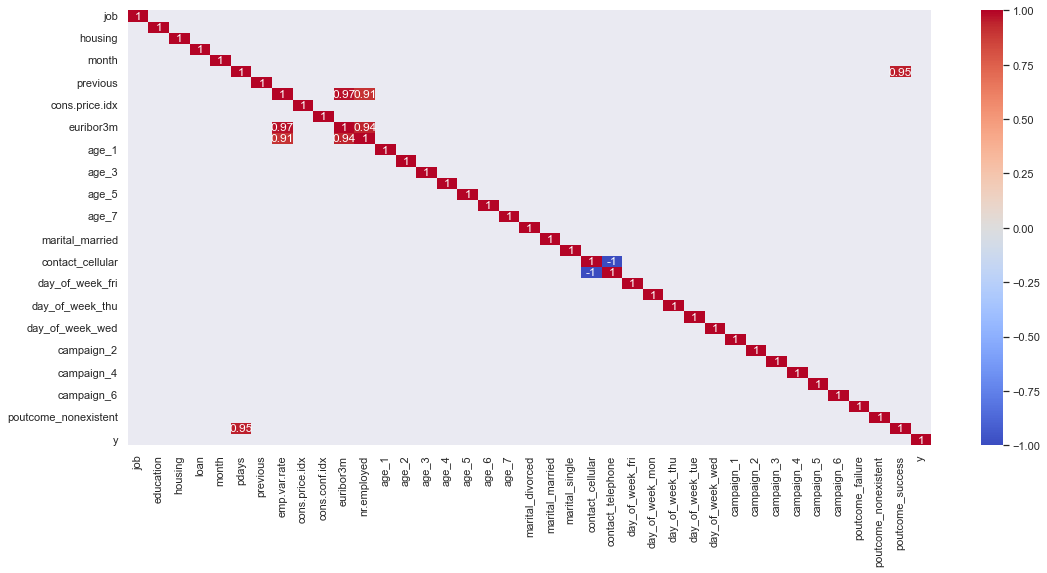

In [493]:
# create correlation matrix
corr = df.corr()

# create heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=(corr.abs() < 0.90))


In [494]:
X_rfecv = df.drop('y', axis=1)
target_rfecv = df['y']

rfc = lgb.LGBMClassifier(random_state=123)
rfecv = RFECV(estimator=rfc, step=1, scoring='f1_weighted')
rfecv = rfecv.fit(X_rfecv.values, target_rfecv.values)

Optimal number of features: 4


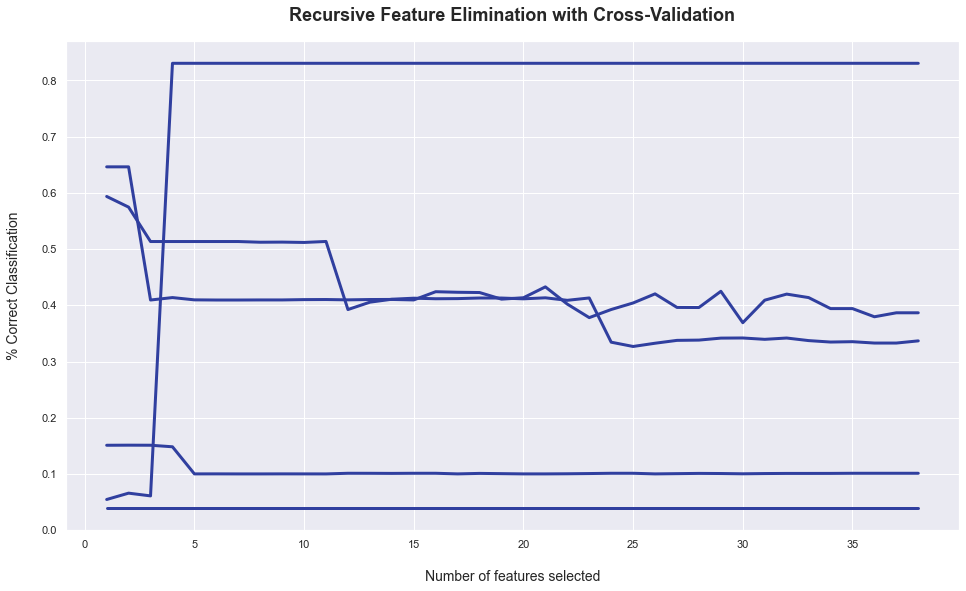

In [495]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [496]:
from numpy import array

mask = rfecv.get_support()
features = array(X_rfecv.columns) 
best_features = features[mask]
 
print("All features: ", X_rfecv.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(features[mask])

All features:  38
['job' 'education' 'housing' 'loan' 'month' 'pdays' 'previous'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'age_1' 'age_2' 'age_3' 'age_4' 'age_5' 'age_6' 'age_7'
 'marital_divorced' 'marital_married' 'marital_single' 'contact_cellular'
 'contact_telephone' 'day_of_week_fri' 'day_of_week_mon' 'day_of_week_thu'
 'day_of_week_tue' 'day_of_week_wed' 'campaign_1' 'campaign_2'
 'campaign_3' 'campaign_4' 'campaign_5' 'campaign_6' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']
Selected best:  4
['job' 'education' 'month' 'euribor3m']


In [497]:
bank = df[best_features]

In [498]:
bank

,job,education,month,euribor3m
0,0.029307,0.25,1.000000,0.957379
1,0.327334,0.50,1.000000,0.957379
2,0.327334,0.50,1.000000,0.957379
3,1.000000,0.25,1.000000,0.957379
4,0.327334,0.50,1.000000,0.957379
...,...,...,...,...
41183,0.095881,1.00,0.305375,0.089322
41184,0.855429,1.00,0.305375,0.089322
41185,0.095881,0.75,0.305375,0.089322
41186,0.614053,1.00,0.305375,0.089322


## Modeling

In [499]:
x = df.drop(columns=['y'])
#x = bank
y = df['y']

In [500]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=123)

In [501]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()
gbc = GradientBoostingClassifier()
gnb = GaussianNB()
bc = BaggingClassifier()
ab = AdaBoostClassifier()

In [502]:
models = [logreg,knn,dt,rf,xgb,lgbm,gbc,gnb,bc,ab]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1_weighted')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','Gradient Boosting Classifier','Naive Bayes','Bagging Classifier','Adaboost Classifier'],'mean f1 weighted':rata,'sdev':std}).set_index('model').sort_values(by='mean f1 weighted',ascending=False)

,mean f1 weighted,sdev
model,,
LightGBM,0.878319,0.002185
Gradient Boosting Classifier,0.877644,0.001290
XGBoost,0.877446,0.001466
Logistic Regression,0.872875,0.002198
Adaboost Classifier,0.872272,0.001863
Random Forest,0.870882,0.002301
KNN,0.865679,0.001198
Bagging Classifier,0.862674,0.001796
Naive Bayes,0.849341,0.004250


In [503]:
models = [logreg,knn,dt,rf,xgb,lgbm,gbc,gnb,bc,ab]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','Gradient Boosting Classifier','Naive Bayes','Bagging Classifier','Adaboost Classifier']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','Gradient Boosting Classifier','Naive Bayes','Bagging Classifier','Adaboost Classifier'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6372
           1       0.67      0.25      0.36       831

    accuracy                           0.90      7203
   macro avg       0.79      0.62      0.65      7203
weighted avg       0.88      0.90      0.88      7203

KNN 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6372
           1       0.56      0.24      0.34       831

    accuracy                           0.89      7203
   macro avg       0.74      0.61      0.64      7203
weighted avg       0.87      0.89      0.87      7203

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      6372
           1       0.34      0.35      0.35       831

    accuracy                           0.85      7203
   macro avg       0.63      0.63      0.63      7203
weighted avg       0.85      0

,roc_auc score
model,
Gradient Boosting Classifier,0.807301
LightGBM,0.805902
Adaboost Classifier,0.801461
Logistic Regression,0.795531
XGBoost,0.793160
Random Forest,0.776497
Naive Bayes,0.766526
Bagging Classifier,0.743524
KNN,0.699568


In [504]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='weighted')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [505]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=123)

In [506]:
data = x_train
target = y_train

In [507]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_random_oversampling = []
validation_errors_with_random_oversampling = []

train_errors_with_smote_oversampling = []
validation_errors_with_smote_oversampling = []

train_errors_with_random_undersampling = []
validation_errors_with_random_undersampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler(random_state = 123, sampling_strategy=0.5)

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)
    
    smot = SMOTE(random_state = 123, sampling_strategy=0.5)

    X_smote, Y_smote = smot.fit_resample(X_train, Y_train)
    
    rus = RandomUnderSampler(random_state = 123, sampling_strategy=0.5)

    X_rus, Y_rus = rus.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_random_oversampling, val_error_with_random_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    train_error_with_smote_oversampling, val_error_with_smote_oversampling = calc_metrics( X_smote, Y_smote, X_val, Y_val, estimator)
    train_error_with_random_undersampling, val_error_with_random_undersampling = calc_metrics(X_rus, Y_rus, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_random_oversampling.append(train_error_with_random_oversampling)
    validation_errors_with_random_oversampling.append(val_error_with_random_oversampling)
    
    train_errors_with_smote_oversampling.append(train_error_with_smote_oversampling)
    validation_errors_with_smote_oversampling.append(val_error_with_smote_oversampling)
    
    train_errors_with_random_undersampling.append(train_error_with_random_undersampling)
    validation_errors_with_random_undersampling.append(val_error_with_random_undersampling)

In [508]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.913726,0.900069,0.875172,0.836912,0.897585,0.879929,0.335115,0.261261,0.802400,0.674419
1,0.914115,0.897952,0.879653,0.803093,0.898899,0.878472,0.347695,0.262048,0.791635,0.639706
2,0.914308,0.895869,0.877767,0.790595,0.898589,0.876287,0.341683,0.256024,0.802983,0.615942
3,0.913575,0.901423,0.877214,0.818000,0.897682,0.883437,0.338009,0.286145,0.796223,0.669014
4,0.912842,0.899688,0.879382,0.805689,0.896693,0.883141,0.333333,0.298193,0.790808,0.638710
5,0.912534,0.901076,0.882835,0.785304,0.896804,0.882974,0.337788,0.285285,0.779491,0.669014
6,0.914038,0.896564,0.880049,0.790597,0.898328,0.878623,0.341129,0.276276,0.798905,0.617450
7,0.913768,0.897258,0.878315,0.775031,0.898233,0.880254,0.342800,0.288288,0.792278,0.619355
8,0.912495,0.901076,0.879266,0.800954,0.896205,0.882141,0.330772,0.276276,0.788217,0.676471
9,0.913266,0.901076,0.880473,0.804045,0.897255,0.881285,0.335783,0.267267,0.793839,0.684615


In [509]:
listItem = []

for tr,val in zip(train_errors_with_random_oversampling,validation_errors_with_random_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.821329,0.880985,0.889576,0.837909,0.814313,0.883954,0.613446,0.546547,0.804092,0.486631
1,0.818655,0.874349,0.886767,0.794972,0.811239,0.878402,0.605598,0.536145,0.801870,0.461140
2,0.818858,0.874349,0.887424,0.790961,0.811339,0.879074,0.604465,0.551205,0.803431,0.462121
3,0.819294,0.872614,0.884112,0.818261,0.811742,0.878127,0.604465,0.560241,0.804830,0.457002
4,0.815458,0.870531,0.887816,0.801081,0.807835,0.877032,0.599843,0.572289,0.796273,0.451306
5,0.819096,0.874349,0.888086,0.792555,0.811816,0.877975,0.607778,0.528529,0.801518,0.461942
6,0.818486,0.877473,0.889415,0.794766,0.811110,0.879823,0.605947,0.516517,0.801037,0.472527
7,0.819765,0.864977,0.890835,0.766068,0.812521,0.870389,0.608912,0.519520,0.802736,0.430348
8,0.820840,0.881291,0.886057,0.794977,0.813656,0.884184,0.610743,0.546547,0.804688,0.487936
9,0.818544,0.875738,0.890789,0.803421,0.811238,0.879597,0.606906,0.540541,0.800460,0.467532


In [510]:
listItem = []

for tr,val in zip(train_errors_with_smote_oversampling,validation_errors_with_smote_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.926259,0.897294,0.962614,0.826745,0.924680,0.880827,0.817405,0.294294,0.954874,0.616352
1,0.928177,0.899341,0.962530,0.796448,0.926669,0.883388,0.821503,0.304217,0.956932,0.631250
2,0.927799,0.892051,0.962914,0.784805,0.926296,0.876950,0.821416,0.295181,0.955763,0.560000
3,0.927334,0.897605,0.962023,0.811873,0.925847,0.883034,0.821765,0.316265,0.953846,0.606936
4,0.928497,0.900035,0.962213,0.807099,0.926995,0.888459,0.821939,0.361446,0.957538,0.612245
5,0.928295,0.899688,0.962413,0.791180,0.926814,0.883217,0.822637,0.300300,0.956116,0.641026
6,0.928353,0.895869,0.962317,0.790985,0.926899,0.881981,0.823770,0.321321,0.955111,0.591160
7,0.927627,0.895869,0.962750,0.769235,0.926083,0.882223,0.819672,0.324324,0.957035,0.590164
8,0.928818,0.898646,0.962615,0.795323,0.927307,0.882913,0.821765,0.306306,0.958795,0.625767
9,0.929342,0.896217,0.962633,0.794640,0.927956,0.880754,0.827258,0.303303,0.954715,0.601190


In [511]:
listItem = []

for tr,val in zip(train_errors_with_random_undersampling,validation_errors_with_random_undersampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.822141,0.868494,0.886690,0.831956,0.814606,0.875077,0.607417,0.564565,0.811607,0.445498
1,0.823759,0.866366,0.886742,0.793281,0.816168,0.872684,0.608216,0.545181,0.816226,0.436145
2,0.825874,0.868101,0.890971,0.785975,0.818030,0.874788,0.606880,0.563253,0.824410,0.443128
3,0.819528,0.870531,0.886730,0.814078,0.810925,0.877404,0.591516,0.581325,0.816505,0.451991
4,0.824538,0.864283,0.888862,0.798541,0.816160,0.872614,0.598864,0.581325,0.827030,0.433708
5,0.825593,0.867060,0.888029,0.787477,0.818543,0.873842,0.617107,0.561562,0.814733,0.441038
6,0.828266,0.868101,0.886260,0.787605,0.820552,0.873182,0.610758,0.528529,0.829025,0.441103
7,0.825704,0.861854,0.887315,0.776583,0.817888,0.868701,0.607083,0.534535,0.823663,0.422803
8,0.825259,0.875043,0.889735,0.793808,0.817983,0.880115,0.613765,0.564565,0.816444,0.466501
9,0.823922,0.870184,0.885490,0.799155,0.816413,0.877237,0.609422,0.585586,0.815742,0.452436


In [512]:
for rep in validation_errors_with_smote_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2549
           1       0.62      0.29      0.40       333

    accuracy                           0.90      2882
   macro avg       0.77      0.64      0.67      2882
weighted avg       0.88      0.90      0.88      2882

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      2549
           1       0.63      0.30      0.41       332

    accuracy                           0.90      2881
   macro avg       0.77      0.64      0.68      2881
weighted avg       0.88      0.90      0.88      2881

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2549
           1       0.56      0.30      0.39       332

    accuracy                           0.89      2881
   macro avg       0.74      0.63      0.66      2881
weighted avg       0.87      0.89      0.88      2881

              preci

### Hyperparameter Tuning

In [513]:
import optuna
from sklearn.metrics import log_loss


def objective(trial, X, y):
    param_grid = {}  # to be filled in later
    cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=123)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="roc_auc",
            early_stopping_rounds=100,
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [514]:
from optuna.integration import LightGBMPruningCallback


def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [515]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_smote,Y_smote)
study.optimize(func, n_trials=200)

[I 2023-05-04 14:08:40,152] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=3600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3600
[LightGBM] [Warning] min_gain_to_split is set=2.4037138855911517, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4037138855911517
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set

[I 2023-05-04 14:15:55,232] Trial 0 finished with value: 0.28125709202942434 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18076160042740363, 'num_leaves': 1340, 'max_depth': 5, 'min_data_in_leaf': 3600, 'lambda_l1': 15, 'lambda_l2': 15, 'min_gain_to_split': 2.4037138855911517, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.28125709202942434.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=5100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5100
[LightGBM] [Warning] min_gain_to_split is set=10.827422250376799, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.827422250376799
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

[I 2023-05-04 14:16:10,102] Trial 1 finished with value: 0.3992797710396856 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1952959499034532, 'num_leaves': 2940, 'max_depth': 3, 'min_data_in_leaf': 5100, 'lambda_l1': 95, 'lambda_l2': 75, 'min_gain_to_split': 10.827422250376799, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.28125709202942434.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=13.432798126271631, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.432798126271631
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=4

[I 2023-05-04 14:16:16,169] Trial 2 finished with value: 0.31142417229205943 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08605200893648603, 'num_leaves': 1200, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 35, 'lambda_l2': 95, 'min_gain_to_split': 13.432798126271631, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.28125709202942434.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=6800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6800
[LightGBM] [Warning] min_gain_to_split is set=11.643096682785254, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.643096682785254
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Wa

[I 2023-05-04 14:17:12,739] Trial 3 finished with value: 0.42148998193123255 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18375895644193344, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 6800, 'lambda_l1': 40, 'lambda_l2': 70, 'min_gain_to_split': 11.643096682785254, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 0 with value: 0.28125709202942434.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4500
[LightGBM] [Warning] min_gain_to_split is set=9.622261175092001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.622261175092001
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4

[I 2023-05-04 14:17:24,145] Trial 4 finished with value: 0.3698108511964886 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2275370691042743, 'num_leaves': 80, 'max_depth': 10, 'min_data_in_leaf': 4500, 'lambda_l1': 65, 'lambda_l2': 85, 'min_gain_to_split': 9.622261175092001, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.28125709202942434.
[I 2023-05-04 14:17:24,275] Trial 5 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10000
[LightGBM] [Warning] min_gain_to_split is set=11.69204546130089, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.69204546130089
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set

[I 2023-05-04 14:17:35,060] Trial 6 finished with value: 0.34579410483449996 and parameters: {'n_estimators': 10000, 'learning_rate': 0.21580378875310421, 'num_leaves': 2420, 'max_depth': 9, 'min_data_in_leaf': 2900, 'lambda_l1': 45, 'lambda_l2': 20, 'min_gain_to_split': 10.180019833319347, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.28125709202942434.
[I 2023-05-04 14:17:35,145] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:17:35,240] Trial 8 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] min_gain_to_split is set=14.468628920407054, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.468628920407054
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:17:35,413] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:17:35,673] Trial 10 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=5.713920513022787, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.713920513022787
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:18:16,534] Trial 11 finished with value: 0.27194194932883553 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10483124660260862, 'num_leaves': 1020, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 5.713920513022787, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 11 with value: 0.27194194932883553.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=5.101966610011641, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.101966610011641
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=500, 

[I 2023-05-04 14:22:45,851] Trial 12 finished with value: 0.26112854660411416 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1314248913894234, 'num_leaves': 840, 'max_depth': 6, 'min_data_in_leaf': 500, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 5.101966610011641, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 12 with value: 0.26112854660411416.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_gain_to_split is set=5.744767926720918, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.744767926720918
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=300, 

[I 2023-05-04 14:26:53,915] Trial 13 finished with value: 0.2525468333813777 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12073802357419895, 'num_leaves': 620, 'max_depth': 6, 'min_data_in_leaf': 300, 'lambda_l1': 0, 'lambda_l2': 30, 'min_gain_to_split': 5.744767926720918, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:26:54,081] Trial 14 pruned. Trial was pruned at iteration 2.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] min_gain_to_split is set=5.729811589942951, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.729811589942951
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:26:54,296] Trial 15 pruned. Trial was pruned at iteration 3.
[I 2023-05-04 14:26:54,487] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:26:54,632] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:26:54,809] Trial 18 pruned. Trial was pruned at iteration 3.
[I 2023-05-04 14:26:54,946] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:26:55,091] Trial 20 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:26:59,253] Trial 21 pruned. Trial was pruned at iteration 930.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=6.067588199667402, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.067588199667402
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current val

[I 2023-05-04 14:28:09,840] Trial 22 finished with value: 0.26107312539855665 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1001279139399284, 'num_leaves': 800, 'max_depth': 7, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 30, 'min_gain_to_split': 6.067588199667402, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:28:10,031] Trial 23 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] min_gain_to_split is set=6.8759390728568635, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.8759390728568635
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:28:15,525] Trial 24 pruned. Trial was pruned at iteration 826.
[I 2023-05-04 14:28:15,797] Trial 25 pruned. Trial was pruned at iteration 1.
[I 2023-05-04 14:28:15,962] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:28:16,129] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:28:16,447] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:28:16,629] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:28:16,834] Trial 30 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:28:22,047] Trial 31 pruned. Trial was pruned at iteration 826.
[I 2023-05-04 14:28:22,228] Trial 32 pruned. Trial was pruned at iteration 2.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=5.025245153083166, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.025245153083166
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:30:18,385] Trial 33 finished with value: 0.25634519372038866 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1012104659322187, 'num_leaves': 1240, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 5.025245153083166, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:30:18,624] Trial 34 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] min_gain_to_split is set=6.756327519035921, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.756327519035921
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:30:19,055] Trial 35 pruned. Trial was pruned at iteration 18.
[I 2023-05-04 14:30:19,228] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:30:19,432] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:30:19,629] Trial 38 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=9.14210042033775, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.14210042033775
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.300000

[I 2023-05-04 14:30:30,478] Trial 39 finished with value: 0.27905228960300066 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17313356489333215, 'num_leaves': 580, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 9.14210042033775, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:30:30,836] Trial 40 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain_to_split is set=6.488626985685184, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.488626985685184
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:30:31,074] Trial 41 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:30:31,242] Trial 42 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:30:31,510] Trial 43 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=4.4289266701827295, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.4289266701827295
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60000

[I 2023-05-04 14:33:42,427] Trial 44 finished with value: 0.2557933644560606 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12065248075052516, 'num_leaves': 1180, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 40, 'min_gain_to_split': 4.4289266701827295, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:33:42,676] Trial 45 pruned. Trial was pruned at iteration 1.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] min_gain_to_split is set=4.3797913158405075, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.3797913158405075
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:33:42,934] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:33:43,103] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:33:43,441] Trial 48 pruned. Trial was pruned at iteration 67.
[I 2023-05-04 14:33:43,616] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:33:43,824] Trial 50 pruned. Trial was pruned at iteration 8.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=5.276770855582101, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.276770855582101
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:33:58,551] Trial 51 pruned. Trial was pruned at iteration 1625.
[I 2023-05-04 14:33:59,188] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:33:59,729] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:00,048] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:00,284] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:04,530] Trial 56 pruned. Trial was pruned at iteration 566.
[I 2023-05-04 14:34:04,734] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:04,902] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:05,055] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:05,201] Trial 60 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=9.962542601968956, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.962542601968956
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=500, 

[I 2023-05-04 14:34:12,824] Trial 61 finished with value: 0.2784624817033809 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16464022790751281, 'num_leaves': 600, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 9.962542601968956, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=10.35492596141712, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.35492596141712
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:34:13,338] Trial 62 pruned. Trial was pruned at iteration 175.
[I 2023-05-04 14:34:13,485] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:13,677] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:13,867] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:14,096] Trial 66 pruned. Trial was pruned at iteration 3.
[I 2023-05-04 14:34:14,270] Trial 67 pruned. Trial was pruned at iteration 6.
[I 2023-05-04 14:34:14,454] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:14,600] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:14,745] Trial 70 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=9.241942742505515, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.241942742505515
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3000

[I 2023-05-04 14:34:22,513] Trial 71 finished with value: 0.27467985555807234 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1737410808800435, 'num_leaves': 560, 'max_depth': 7, 'min_data_in_leaf': 400, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 9.241942742505515, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.339055871374656, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.339055871374656
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3000

[I 2023-05-04 14:34:30,896] Trial 72 finished with value: 0.267888312425301 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17958914884279872, 'num_leaves': 520, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 8.339055871374656, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.16576255181303, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.16576255181303
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:34:37,031] Trial 73 finished with value: 0.27444248590616327 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17526274365043312, 'num_leaves': 500, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 8.16576255181303, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.344973142180631, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.344973142180631
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:34:43,193] Trial 74 finished with value: 0.27327255185853927 and parameters: {'n_estimators': 10000, 'learning_rate': 0.20615484265645814, 'num_leaves': 340, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 8.344973142180631, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=7.1484960178614845, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.1484960178614845
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:34:45,953] Trial 75 pruned. Trial was pruned at iteration 889.
[I 2023-05-04 14:34:46,100] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:46,235] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:46,623] Trial 78 pruned. Trial was pruned at iteration 111.
[I 2023-05-04 14:34:46,761] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:34:46,904] Trial 80 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.366809552506178, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.366809552506178
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:34:52,326] Trial 81 finished with value: 0.2699488248271385 and parameters: {'n_estimators': 10000, 'learning_rate': 0.20247717182144265, 'num_leaves': 500, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 25, 'min_gain_to_split': 8.366809552506178, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=7.556307541901326, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.556307541901326
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=400, 

[I 2023-05-04 14:35:01,404] Trial 82 finished with value: 0.2683815582092107 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19761226981828614, 'num_leaves': 760, 'max_depth': 6, 'min_data_in_leaf': 400, 'lambda_l1': 0, 'lambda_l2': 25, 'min_gain_to_split': 7.556307541901326, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=7.710406811414897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.710406811414897
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3000

[I 2023-05-04 14:35:11,724] Trial 83 finished with value: 0.2707066799465233 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1864951055867259, 'num_leaves': 760, 'max_depth': 6, 'min_data_in_leaf': 500, 'lambda_l1': 0, 'lambda_l2': 30, 'min_gain_to_split': 7.710406811414897, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=7.632710197500896, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.632710197500896
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:35:12,477] Trial 84 pruned. Trial was pruned at iteration 262.
[I 2023-05-04 14:35:12,775] Trial 85 pruned. Trial was pruned at iteration 47.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=8.772138862304672, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.772138862304672
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3000

[I 2023-05-04 14:35:18,209] Trial 86 finished with value: 0.27072673400577674 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19405496535411013, 'num_leaves': 460, 'max_depth': 7, 'min_data_in_leaf': 400, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 8.772138862304672, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:35:18,453] Trial 87 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=6100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6100
[LightGBM] [Warning] min_gain_to_split is set=7.264024078550258, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.264024078550258
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:35:18,631] Trial 88 pruned. Trial was pruned at iteration 8.
[I 2023-05-04 14:35:18,790] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:19,749] Trial 90 pruned. Trial was pruned at iteration 347.
[I 2023-05-04 14:35:20,659] Trial 91 pruned. Trial was pruned at iteration 347.
[I 2023-05-04 14:35:20,889] Trial 92 pruned. Trial was pruned at iteration 36.
[I 2023-05-04 14:35:21,095] Trial 93 pruned. Trial was pruned at iteration 34.
[I 2023-05-04 14:35:21,738] Trial 94 pruned. Trial was pruned at iteration 238.
[I 2023-05-04 14:35:21,866] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:22,015] Trial 96 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:22,143] Trial 97 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:22,281] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:22,579] Trial 99 pruned. Trial was pruned at iteration 68.
[I 2023-05-04 14:35:22,826] Trial 100 pruned. Trial was

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.429844398602079, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.429844398602079
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3000

[I 2023-05-04 14:35:29,301] Trial 113 finished with value: 0.2691053875533279 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19262455263657688, 'num_leaves': 560, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 25, 'min_gain_to_split': 8.429844398602079, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=7.72357126629254, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.72357126629254
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:35:29,777] Trial 114 pruned. Trial was pruned at iteration 149.
[I 2023-05-04 14:35:29,923] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:30,202] Trial 116 pruned. Trial was pruned at iteration 44.
[I 2023-05-04 14:35:30,350] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:35:30,664] Trial 118 pruned. Trial was pruned at iteration 65.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=5.214193219166855, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.214193219166855
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000

[I 2023-05-04 14:35:43,715] Trial 119 finished with value: 0.2669936480488081 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17123079505323713, 'num_leaves': 880, 'max_depth': 6, 'min_data_in_leaf': 400, 'lambda_l1': 5, 'lambda_l2': 55, 'min_gain_to_split': 5.214193219166855, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:35:43,899] Trial 120 pruned. Trial was pruned at iteration 5.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=5.1861835725013, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.1861835725013
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60000000000

[I 2023-05-04 14:36:07,738] Trial 121 finished with value: 0.2568926102600829 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16544565515676368, 'num_leaves': 960, 'max_depth': 6, 'min_data_in_leaf': 400, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 4.827025591610517, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:36:07,965] Trial 122 pruned. Trial was pruned at iteration 5.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=4.780700928784344, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.780700928784344
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:36:08,119] Trial 123 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=4.013129597801312, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.013129597801312
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000

[I 2023-05-04 14:36:17,006] Trial 124 finished with value: 0.25377391349909445 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15996207779099653, 'num_leaves': 1000, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 4.013129597801312, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=4.119513332187239, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.119513332187239
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000

[I 2023-05-04 14:36:23,338] Trial 125 finished with value: 0.25413270672219335 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15946399282186516, 'num_leaves': 1000, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 4.119513332187239, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:36:23,517] Trial 126 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=9700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9700
[LightGBM] [Warning] min_gain_to_split is set=4.076309487604304, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.076309487604304
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:36:23,720] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:23,922] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:24,084] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:24,235] Trial 130 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=5.08003242659271, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.08003242659271
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600000000

[I 2023-05-04 14:36:34,677] Trial 131 finished with value: 0.26445398715007584 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1752263528939908, 'num_leaves': 820, 'max_depth': 10, 'min_data_in_leaf': 400, 'lambda_l1': 5, 'lambda_l2': 55, 'min_gain_to_split': 5.08003242659271, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:36:34,928] Trial 132 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=4.904689932287984, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.904689932287984
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000

[I 2023-05-04 14:36:44,917] Trial 133 finished with value: 0.26282265192776866 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17121530387257686, 'num_leaves': 980, 'max_depth': 10, 'min_data_in_leaf': 300, 'lambda_l1': 5, 'lambda_l2': 60, 'min_gain_to_split': 4.998981458406475, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:36:45,090] Trial 134 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=5.166830677600059, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.166830677600059
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:36:45,260] Trial 135 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:45,622] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:45,818] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:45,977] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:46,276] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:46,467] Trial 140 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:46,644] Trial 141 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:46,821] Trial 142 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:46,971] Trial 143 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:47,220] Trial 144 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=4.765830939119066, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.765830939119066
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:36:57,666] Trial 145 finished with value: 0.2529536880647102 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1750535786136663, 'num_leaves': 920, 'max_depth': 6, 'min_data_in_leaf': 200, 'lambda_l1': 0, 'lambda_l2': 25, 'min_gain_to_split': 4.765830939119066, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.2525468333813777.
[I 2023-05-04 14:36:57,862] Trial 146 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=4.8889829488719245, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.8889829488719245
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:36:58,037] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:58,202] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:36:58,350] Trial 149 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=3.388150292746448, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.388150292746448
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:37:22,599] Trial 150 finished with value: 0.24382739579349302 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1753056648615506, 'num_leaves': 1320, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 3.388150292746448, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 150 with value: 0.24382739579349302.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_gain_to_split is set=3.378986043505932, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.378986043505932
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, 

[I 2023-05-04 14:38:29,663] Trial 151 finished with value: 0.24688871110926902 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17512507696393884, 'num_leaves': 1280, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 3.378986043505932, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 150 with value: 0.24382739579349302.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=3.246288145050247, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.246288145050247
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, mi

[I 2023-05-04 14:40:24,554] Trial 152 finished with value: 0.2484232850977382 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17501078271168852, 'num_leaves': 1240, 'max_depth': 9, 'min_data_in_leaf': 600, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 3.246288145050247, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 150 with value: 0.24382739579349302.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=3.3449434403737186, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3449434403737186
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, 

[I 2023-05-04 14:42:00,496] Trial 153 finished with value: 0.24859885935173293 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1745284590030606, 'num_leaves': 1280, 'max_depth': 9, 'min_data_in_leaf': 600, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 3.3449434403737186, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 150 with value: 0.24382739579349302.
[I 2023-05-04 14:42:00,672] Trial 154 pruned. Trial was pruned at iteration 3.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=2.953041580674455, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.953041580674455
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:42:00,859] Trial 155 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:42:01,044] Trial 156 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=2.5717989255730105, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5717989255730105
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, 

[I 2023-05-04 14:43:37,881] Trial 157 finished with value: 0.24162994059515658 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1719721934961966, 'num_leaves': 1520, 'max_depth': 9, 'min_data_in_leaf': 500, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 2.5717989255730105, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 157 with value: 0.24162994059515658.
[I 2023-05-04 14:43:38,067] Trial 158 pruned. Trial was pruned at iteration 3.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=2.6240341383411407, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6240341383411407
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:43:38,258] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:43:38,463] Trial 160 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=2.537612255915405, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.537612255915405
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=400, 

[I 2023-05-04 14:46:17,382] Trial 161 finished with value: 0.24126506428504418 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1720413000293694, 'num_leaves': 1680, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 2.537612255915405, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 161 with value: 0.24126506428504418.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.641437745406324, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.641437745406324
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:46:54,149] Trial 162 finished with value: 0.2390211537743112 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16866727649045848, 'num_leaves': 1680, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 2.641437745406324, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_gain_to_split is set=2.68226994790154, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.68226994790154
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, mi

[I 2023-05-04 14:47:56,649] Trial 163 finished with value: 0.2489415871835033 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1660437602680752, 'num_leaves': 1700, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 2.68226994790154, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.6468457119465807, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6468457119465807
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:48:15,326] Trial 164 finished with value: 0.24515370706107675 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16350283262697987, 'num_leaves': 1740, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 2.6468457119465807, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.623415944598098, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.623415944598098
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:48:33,774] Trial 165 finished with value: 0.24499999531440936 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16454533091918142, 'num_leaves': 1780, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 2.623415944598098, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.547338621433266, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.547338621433266
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:48:52,186] Trial 166 finished with value: 0.245032327736457 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16559329721064253, 'num_leaves': 1760, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 2.547338621433266, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.1509441124236908, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1509441124236908
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:49:07,458] Trial 167 finished with value: 0.24762909199427602 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16388337033252476, 'num_leaves': 1760, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 2.1509441124236908, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.
[I 2023-05-04 14:49:07,641] Trial 168 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.0624213916813, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0624213916813
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:49:07,837] Trial 169 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.090261462235919, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.090261462235919
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:49:20,249] Trial 170 finished with value: 0.24689581431507887 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1657162407894316, 'num_leaves': 1920, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 2.090261462235919, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.164804312297659, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.164804312297659
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:49:39,048] Trial 171 finished with value: 0.2470763670260489 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16791108459596718, 'num_leaves': 1900, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 2.164804312297659, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.085634822557845, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.085634822557845
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, 

[I 2023-05-04 14:49:57,232] Trial 172 finished with value: 0.24683884746896445 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16552786479746628, 'num_leaves': 1980, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 2.085634822557845, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.
[I 2023-05-04 14:49:57,478] Trial 173 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=2.126534317315857, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.126534317315857
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:49:57,707] Trial 174 pruned. Trial was pruned at iteration 2.
[I 2023-05-04 14:49:57,924] Trial 175 pruned. Trial was pruned at iteration 2.
[I 2023-05-04 14:49:58,165] Trial 176 pruned. Trial was pruned at iteration 2.
[I 2023-05-04 14:49:58,332] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:49:58,514] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:49:58,683] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:50:00,863] Trial 180 pruned. Trial was pruned at iteration 827.
[I 2023-05-04 14:50:01,027] Trial 181 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=3.0420380200754984, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0420380200754984
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:50:10,546] Trial 182 finished with value: 0.2471561899794054 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16112354705957777, 'num_leaves': 1880, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 3.0420380200754984, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.
[I 2023-05-04 14:50:10,742] Trial 183 pruned. Trial was pruned at iteration 2.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=2.5107130945360727, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5107130945360727
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:50:10,943] Trial 184 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:50:11,129] Trial 185 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:50:11,297] Trial 186 pruned. Trial was pruned at iteration 1.
[I 2023-05-04 14:50:11,463] Trial 187 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:50:12,687] Trial 188 pruned. Trial was pruned at iteration 510.
[I 2023-05-04 14:50:12,857] Trial 189 pruned. Trial was pruned at iteration 1.
[I 2023-05-04 14:50:13,016] Trial 190 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=3.5725182526065087, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5725182526065087
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:50:25,282] Trial 191 finished with value: 0.2512153029042264 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1598782000215065, 'num_leaves': 1740, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 3.5725182526065087, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.
[I 2023-05-04 14:50:25,613] Trial 192 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=3.430325905885261, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.430325905885261
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-05-04 14:50:25,857] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2023-05-04 14:50:26,076] Trial 194 pruned. Trial was pruned at iteration 2.
[I 2023-05-04 14:50:26,279] Trial 195 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=2.319300737286328, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.319300737286328
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:51:35,801] Trial 196 finished with value: 0.24133206490023684 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17694745843887658, 'num_leaves': 1820, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 10, 'min_gain_to_split': 2.319300737286328, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 162 with value: 0.2390211537743112.
[I 2023-05-04 14:51:35,964] Trial 197 pruned. Trial was pruned at iteration 1.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=2.341374672130551, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.341374672130551
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200

[I 2023-05-04 14:52:19,134] Trial 198 finished with value: 0.23872848741260255 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17827728944363067, 'num_leaves': 1900, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 1.9022035850665804, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 198 with value: 0.23872848741260255.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=2.0002905687620998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0002905687620998
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=600

[I 2023-05-04 14:54:50,893] Trial 199 finished with value: 0.24398367930530526 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18787997212154106, 'num_leaves': 1920, 'max_depth': 8, 'min_data_in_leaf': 600, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 2.0002905687620998, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 198 with value: 0.23872848741260255.


In [516]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.23873
	Best params:
		n_estimators: 10000
		learning_rate: 0.17827728944363067
		num_leaves: 1900
		max_depth: 9
		min_data_in_leaf: 200
		lambda_l1: 10
		lambda_l2: 0
		min_gain_to_split: 1.9022035850665804
		bagging_fraction: 0.8
		bagging_freq: 1
		feature_fraction: 0.8


In [517]:
study.best_params

{'n_estimators': 10000,
 'learning_rate': 0.17827728944363067,
 'num_leaves': 1900,
 'max_depth': 9,
 'min_data_in_leaf': 200,
 'lambda_l1': 10,
 'lambda_l2': 0,
 'min_gain_to_split': 1.9022035850665804,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'feature_fraction': 0.8}

In [518]:
best = lgb.LGBMClassifier(**study.best_params)

In [519]:
best

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
               lambda_l1=10, lambda_l2=0, learning_rate=0.17827728944363067,
               max_depth=9, min_data_in_leaf=200,
               min_gain_to_split=1.9022035850665804, n_estimators=10000,
               num_leaves=1900)

In [520]:
# hyperparam_space=[{
#     'model__max_bin': [255, 275, 300, 230],
#     'model__num_leaves':[31, 21, 41, 51],
#     'model__min_data_in_leaf': [20, 15, 30, 40],
#     'model__num_iterations':[100,75, 125, 150],
#     'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
#     'model__random_state': [123]
# }]

In [521]:
# grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='f1_weighted', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))

In [522]:
best_model = best.fit(X_ros,Y_ros)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=1.9022035850665804, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9022035850665804
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [523]:
estimator=Pipeline([
    ('oversampling',ros),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling',
                 RandomOverSampler(random_state=123, sampling_strategy=0.5)),
                ('model', LGBMClassifier())])

In [524]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.8041053556360823
ROC AUC Score Tuned LGBM :  0.8099638498152644


In [525]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      6372
           1       0.46      0.56      0.50       831

    accuracy                           0.87      7203
   macro avg       0.70      0.74      0.72      7203
weighted avg       0.89      0.87      0.88      7203

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      6372
           1       0.46      0.57      0.51       831

    accuracy                           0.87      7203
   macro avg       0.70      0.74      0.72      7203
weighted avg       0.89      0.87      0.88      7203



### Threshold Tuning

In [526]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict_proba(x_test)
y_pred = y_pred[:,1]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=1.9022035850665804, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9022035850665804
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


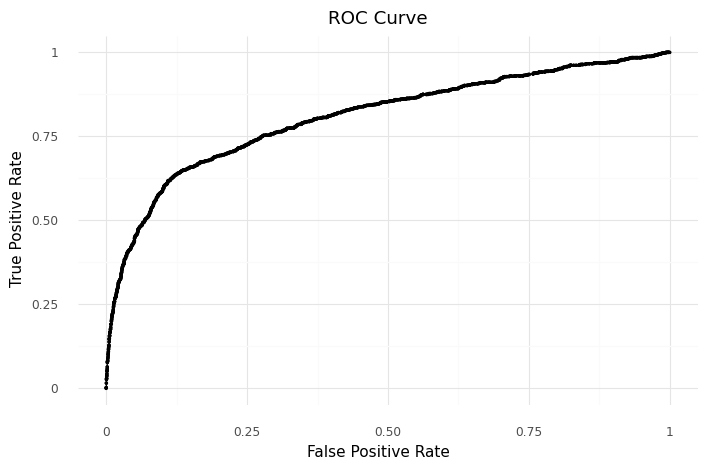

<ggplot: (163655722599)>

In [527]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Create the data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate')+
    ylab('True Positive Rate')+
    theme_minimal()
)

Best Threshold: 0.1051 with G-Mean: 0.7492
FPR: 0.167, TPR: 0.6739


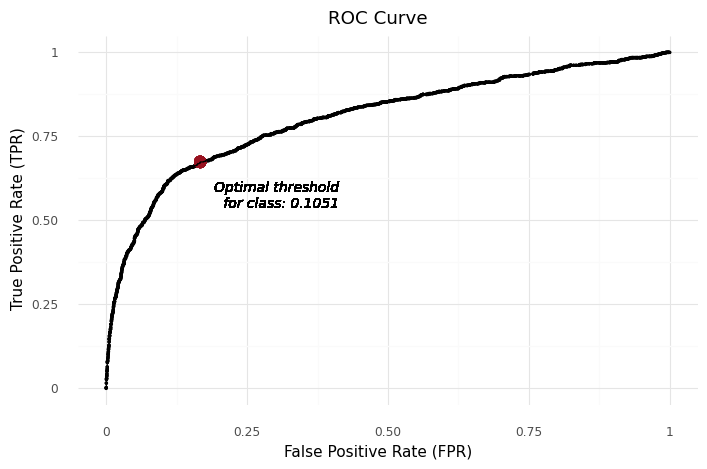

<ggplot: (163635521003)>

In [528]:
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Best Threshold: 0.1252 with Youden J statistic: 0.7489
FPR: 0.1337, TPR: 0.6474


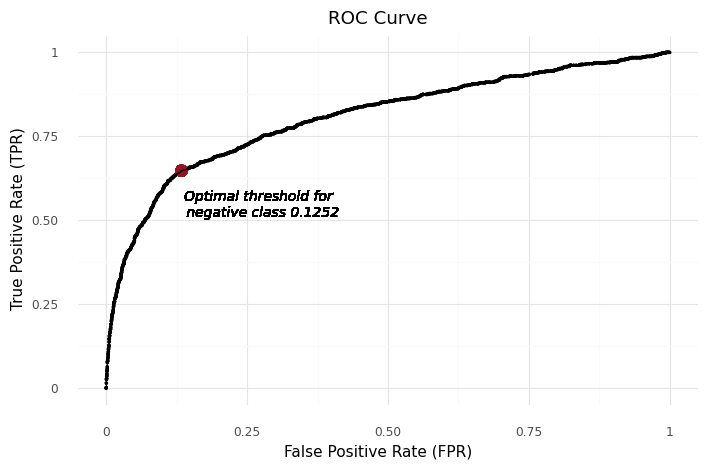

<ggplot: (163657993141)>

In [529]:
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold for \n negative class {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

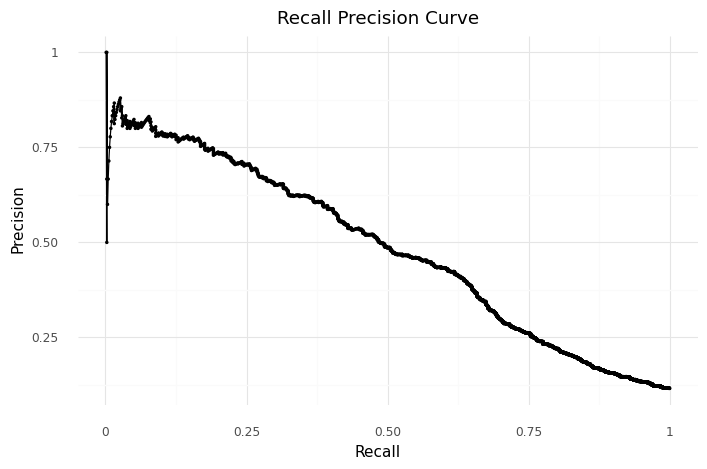

<ggplot: (163695444983)>

In [530]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

# Creat a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

Best Threshold: 0.1863 with F-Score: 0.5047
Recall: 0.5776, Precision: 0.4482


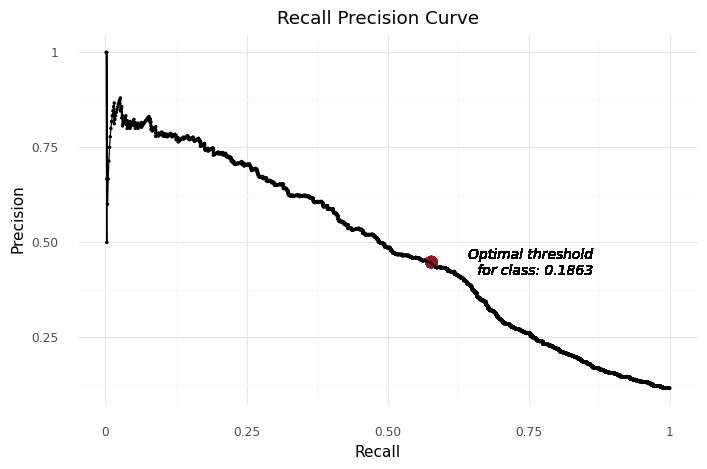

<ggplot: (163679926004)>

In [531]:
fscore = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

Length of sequence: 10000
Best Threshold: 0.1995 with F-Score: 0.5045


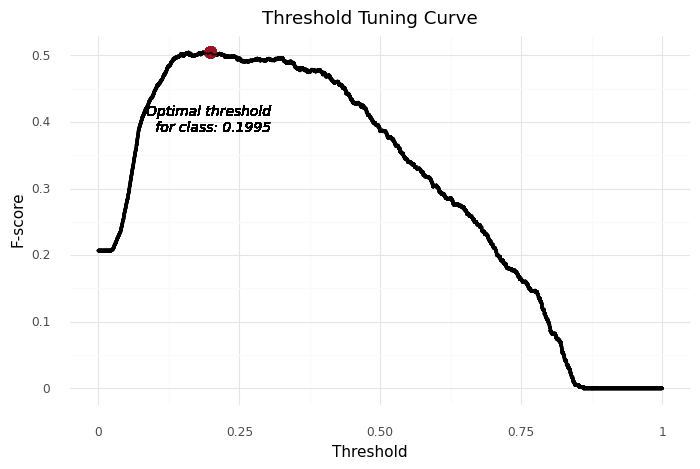

<ggplot: (163680019125)>

In [532]:
thresholds = np.arange(0.0, 1.0, 0.0001)
fscore = np.zeros(shape=(len(thresholds)))
print('Length of sequence: {}'.format(len(thresholds)))

# Fit the model
for index, elem in enumerate(thresholds):
    # Corrected probabilities
    y_pred_prob = (y_pred > elem).astype('int')
    # Calculate the f-score
    fscore[index] = f1_score(y_test, y_pred_prob)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))

# Plot the threshold tuning
df_threshold_tuning = pd.DataFrame({'F-score':fscore,
                                    'Threshold':thresholds})
df_threshold_tuning.head()

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_threshold_tuning)+
    geom_point(aes(x = 'Threshold',
                   y = 'F-score'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = thresholdOpt,
                   y = fscoreOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Threshold',
                   y = 'F-score'))+
    # Annotate the text
    geom_text(aes(x = thresholdOpt,
                  y = fscoreOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Threshold Tuning Curve')+
    xlab('Threshold')+
    ylab('F-score')+
    theme_minimal()
)

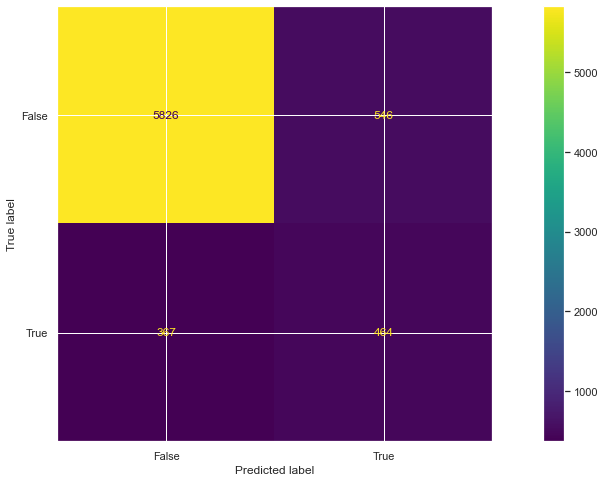

In [533]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [534]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6372
           1       0.46      0.57      0.51       831

    accuracy                           0.87      7203
   macro avg       0.70      0.74      0.72      7203
weighted avg       0.89      0.87      0.88      7203



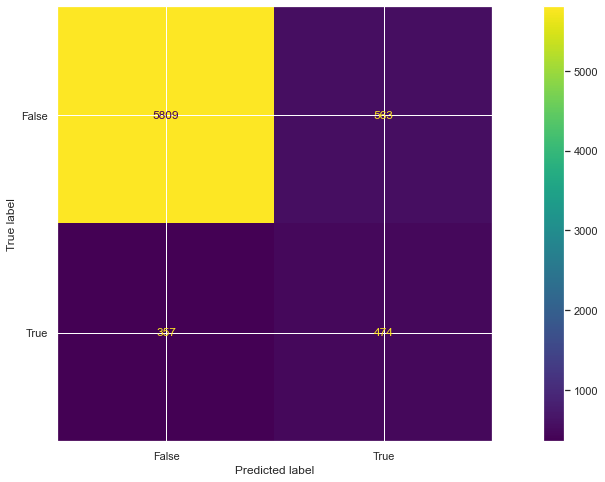

In [535]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_tuned)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [536]:
decisions = (best_model.predict_proba(x_test)[:,1] >= thresholdOpt).astype(int)

In [537]:
print(roc_auc_score(y_test,decisions))

0.7397914726205126


In [538]:
print(classification_report(y_test,decisions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6372
           1       0.45      0.57      0.50       831

    accuracy                           0.87      7203
   macro avg       0.70      0.74      0.72      7203
weighted avg       0.89      0.87      0.88      7203



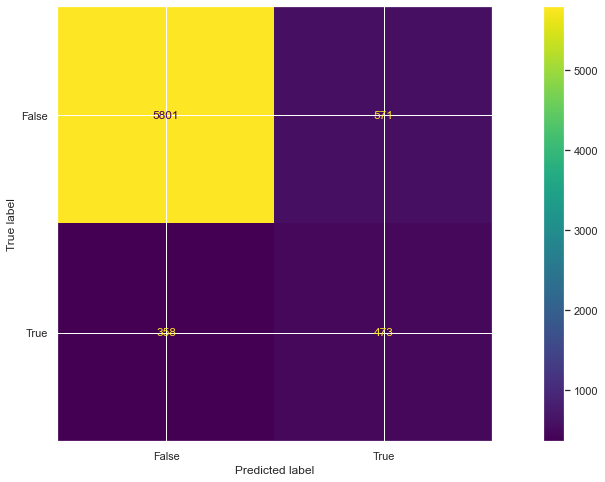

In [539]:
confusion_matrix = metrics.confusion_matrix(y_test, decisions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [540]:
matthews_corrcoef(y_test, y_pred_default)


0.43490134685429227

In [541]:
matthews_corrcoef(y_test, y_pred_tuned)


0.4386639684969118

In [542]:
matthews_corrcoef(y_test, decisions)


0.4352079043812083

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LGBM kita

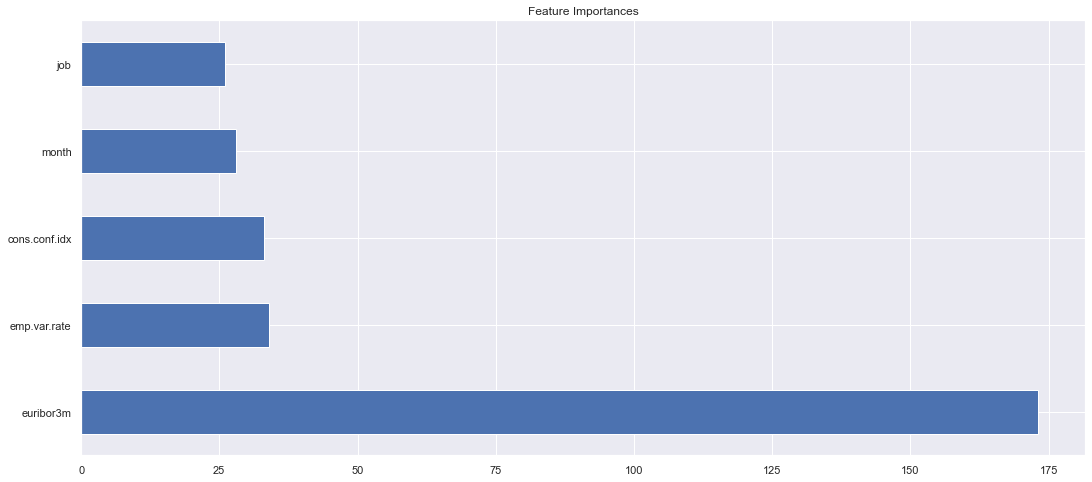

In [543]:
coef1 = pd.Series(best_model.feature_importances_,index = data.columns).sort_values(ascending = False).head()
coef1.plot(kind='barh', title='Feature Importances')
plt.show()